In [1]:
import time
start_time = time.time()
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
import xgboost
from scipy.stats import chi2_contingency, shapiro, mannwhitneyu, ttest_ind
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.metrics import precision_score, recall_score, f1_score, brier_score_loss
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from statistics import mean

In [2]:
df_test = pd.read_parquet("data_fm20_test.parquet")
df = pd.read_parquet("data_fm20_train.parquet")

In [3]:
pd.pandas.set_option('display.max_columns', None)

In [4]:
df.head()

Name          Club                           Division  Height  \
0       Damian Las        Fulham           English Premier Division     183   
1  VÃ­tor Carvalho  Santo AndrÃ©  Brazilian National Lower Division     184   
2      Mehdi Terki        Xanthi               Greek Super League 1     185   
3  Marcelo Cardozo     Los Andes      Argentine Metropolitan B Zone     178   
4  Scott McTominay     Port Vale                 Sky Bet League Two     191   

   Weight  Age Preferred Foot Best Pos   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
0      73   17     Right Only       GK  107    5    5    8    3    6    2   
1      75   19     Right Only   ST (C)  107    8    6    3   13    7    2   
2      77   27      Left Only    M (C)  115   12   10    1   13   10   11   
3      77   31           Left    D (L)  123   13   10    4   11   13   12   
4      85   22          Right    M (C)  148   19    9    2   13   19   16   

   Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  Lon  Ldr  \
0    6    2    9   13   11   11    1    7   12    8    1    6    2    3   11   
1    6    7    3    3    3    8    8    8   12    1   14   10    5    7   11   
2   10   13    3    1    2    9    7   11   13    3   11   13   12    9    6   
3   11   11    2    3    4   12    5   11   12    3   12   12   12   10    8   
4   14   18    2    1    2   14    7   13   14    3   12   15   12   10   12   

   Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  \
0    5    6    1   13    2    1    5    3    1    1   11   13    2    2    8   
1    2    7   14    2    7   12   14   14    3   14    4   14    5    7    9   
2    3   14    9    2    9   10   14    8    2   13   15    9   10   12   10   
3    1    8   11    3    8   12   10    7    1   12    9   11   13   11   11   
4    1   17   14    1    5    6   14   10    3    9   18   11   10    6   13   

   Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  
0    6    6    5   13    6    4   11   14   10   13  
1    9    3    2    7    3    7   12    5    3   11  
2   11    1    2   13   12   12   12   12    2   13  
3   10    1    2   13   12   12   14   14    3   13  
4   11    3    3   16   16   16   13   15    2   13

In [5]:
df.head()

Name          Club                           Division  Height  \
0       Damian Las        Fulham           English Premier Division     183   
1  VÃ­tor Carvalho  Santo AndrÃ©  Brazilian National Lower Division     184   
2      Mehdi Terki        Xanthi               Greek Super League 1     185   
3  Marcelo Cardozo     Los Andes      Argentine Metropolitan B Zone     178   
4  Scott McTominay     Port Vale                 Sky Bet League Two     191   

   Weight  Age Preferred Foot Best Pos   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
0      73   17     Right Only       GK  107    5    5    8    3    6    2   
1      75   19     Right Only   ST (C)  107    8    6    3   13    7    2   
2      77   27      Left Only    M (C)  115   12   10    1   13   10   11   
3      77   31           Left    D (L)  123   13   10    4   11   13   12   
4      85   22          Right    M (C)  148   19    9    2   13   19   16   

   Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  Lon  Ldr  \
0    6    2    9   13   11   11    1    7   12    8    1    6    2    3   11   
1    6    7    3    3    3    8    8    8   12    1   14   10    5    7   11   
2   10   13    3    1    2    9    7   11   13    3   11   13   12    9    6   
3   11   11    2    3    4   12    5   11   12    3   12   12   12   10    8   
4   14   18    2    1    2   14    7   13   14    3   12   15   12   10   12   

   Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  \
0    5    6    1   13    2    1    5    3    1    1   11   13    2    2    8   
1    2    7   14    2    7   12   14   14    3   14    4   14    5    7    9   
2    3   14    9    2    9   10   14    8    2   13   15    9   10   12   10   
3    1    8   11    3    8   12   10    7    1   12    9   11   13   11   11   
4    1   17   14    1    5    6   14   10    3    9   18   11   10    6   13   

   Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  
0    6    6    5   13    6    4   11   14   10   13  
1    9    3    2    7    3    7   12    5    3   11  
2   11    1    2   13   12   12   12   12    2   13  
3   10    1    2   13   12   12   14   14    3   13  
4   11    3    3   16   16   16   13   15    2   13

In [6]:
df.columns

Index(['Name', 'Club', 'Division', 'Height', 'Weight', 'Age', 'Preferred Foot',
       'Best Pos', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str',
       'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB',
       'Nat', 'Mar', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre', 'Fla',
       'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt', 'Cmp',
       'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer', 'Acc'],
      dtype='object')

In [7]:
df_test.columns

Index(['Name', 'Club', 'Division', 'Height', 'Weight', 'Age', 'Preferred Foot',
       'Best Pos', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str',
       'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB',
       'Nat', 'Mar', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre', 'Fla',
       'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt', 'Cmp',
       'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer', 'Acc'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df_test.duplicated().sum()

0

In [10]:
df.shape

(50000, 55)

In [11]:
df_test.shape

(14446, 55)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA', ylabel='Density'>

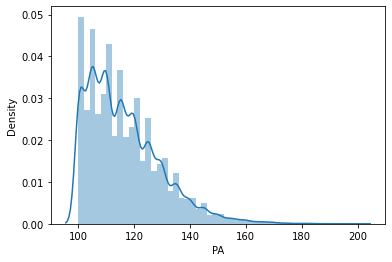

In [12]:
sns.distplot(df.PA)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA', ylabel='Density'>

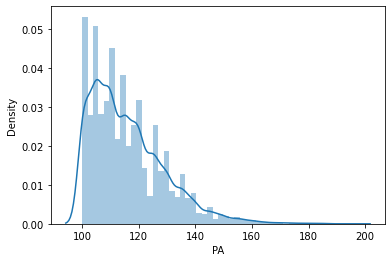

In [13]:
sns.distplot(df_test.PA)

In [14]:
len(df[df["PA"]>=150])/len(df)

0.02194

In [15]:
len(df_test[df_test["PA"]>=150])/len(df_test)

0.02145922746781116

In [16]:
df["Target"] = df["PA"]
df_test["Target"] = df_test["PA"]

In [17]:
def setcategory_target(value):
    
    if value>=150:
        return 1
    
    else:
        return 0
    
df['Target'] = df['PA'].apply(lambda x:setcategory_target(x))
df_test['Target'] = df_test['PA'].apply(lambda x:setcategory_target(x))

In [18]:
df.head()

Name          Club                           Division  Height  \
0       Damian Las        Fulham           English Premier Division     183   
1  VÃ­tor Carvalho  Santo AndrÃ©  Brazilian National Lower Division     184   
2      Mehdi Terki        Xanthi               Greek Super League 1     185   
3  Marcelo Cardozo     Los Andes      Argentine Metropolitan B Zone     178   
4  Scott McTominay     Port Vale                 Sky Bet League Two     191   

   Weight  Age Preferred Foot Best Pos   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
0      73   17     Right Only       GK  107    5    5    8    3    6    2   
1      75   19     Right Only   ST (C)  107    8    6    3   13    7    2   
2      77   27      Left Only    M (C)  115   12   10    1   13   10   11   
3      77   31           Left    D (L)  123   13   10    4   11   13   12   
4      85   22          Right    M (C)  148   19    9    2   13   19   16   

   Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  Lon  Ldr  \
0    6    2    9   13   11   11    1    7   12    8    1    6    2    3   11   
1    6    7    3    3    3    8    8    8   12    1   14   10    5    7   11   
2   10   13    3    1    2    9    7   11   13    3   11   13   12    9    6   
3   11   11    2    3    4   12    5   11   12    3   12   12   12   10    8   
4   14   18    2    1    2   14    7   13   14    3   12   15   12   10   12   

   Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  \
0    5    6    1   13    2    1    5    3    1    1   11   13    2    2    8   
1    2    7   14    2    7   12   14   14    3   14    4   14    5    7    9   
2    3   14    9    2    9   10   14    8    2   13   15    9   10   12   10   
3    1    8   11    3    8   12   10    7    1   12    9   11   13   11   11   
4    1   17   14    1    5    6   14   10    3    9   18   11   10    6   13   

   Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Target  
0    6    6    5   13    6    4   11   14   10   13       0  
1    9    3    2    7    3    7   12    5    3   11       0  
2   11    1    2   13   12   12   12   12    2   13       0  
3   10    1    2   13   12   12   14   14    3   13       0  
4   11    3    3   16   16   16   13   15    2   13       0

In [19]:
df.shape

(50000, 56)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            50000 non-null  object
 1   Club            50000 non-null  object
 2   Division        50000 non-null  object
 3   Height          50000 non-null  int64 
 4   Weight          50000 non-null  int64 
 5   Age             50000 non-null  int64 
 6   Preferred Foot  50000 non-null  object
 7   Best Pos        50000 non-null  object
 8   PA              50000 non-null  int64 
 9   Wor             50000 non-null  int64 
 10  Vis             50000 non-null  int64 
 11  Thr             50000 non-null  int64 
 12  Tec             50000 non-null  int64 
 13  Tea             50000 non-null  int64 
 14  Tck             50000 non-null  int64 
 15  Str             50000 non-null  int64 
 16  Sta             50000 non-null  int64 
 17  TRO             50000 non-null  int64 
 18  Ref   

In [21]:
df.isnull().sum()

Name              0
Club              0
Division          0
Height            0
Weight            0
Age               0
Preferred Foot    0
Best Pos          0
PA                0
Wor               0
Vis               0
Thr               0
Tec               0
Tea               0
Tck               0
Str               0
Sta               0
TRO               0
Ref               0
Pun               0
Pos               0
Pen               0
Pas               0
Pac               0
1v1               0
OtB               0
Nat               0
Mar               0
Lon               0
Ldr               0
Kic               0
Jum               0
Hea               0
Han               0
Fre               0
Fla               0
Fir               0
Fin               0
Ecc               0
Dri               0
Det               0
Dec               0
Cro               0
Cor               0
Cnt               0
Cmp               0
Com               0
Cmd               0
Bra               0
Bal               0


In [22]:
df = pd.get_dummies(df, columns = ["Preferred Foot"])
df_test = pd.get_dummies(df_test, columns = ["Preferred Foot"])

In [23]:
df.sample(10)

Name                      Club  \
10697       David Larrubia                   MÃ¡laga   
46127      HernÃ¡n Rengifo       Alianza Universidad   
36215               Michel                   Pacajus   
26947  Åtefan BodiÅteanu               FC Viitorul   
38340       Paulo da Silva                  Libertad   
36099         Johannes Pex                 Schalding   
31573          Alex Aranda                    ColÃ³n   
4328        Mateo Pavlovic                Angers SCO   
4340          RÃºben Moura           Vit. GuimarÃ£es   
33927    GastÃ³n GonzÃ¡lez  Juventud Unida (RÃ­o IV)   

                               Division  Height  Weight  Age Best Pos   PA  \
10697           Spanish Second Division     172      59   17   AM (C)  131   
46127           Peruvian First Division     183      88   36   ST (C)  128   
36215                           Unknown     178      78   38       DM  130   
26947             Romanian First League     174      65   16   AM (L)  129   
38340         Paraguayan First Division     180      76   39    D (C)  140   
36099  German Regional Division Bavaria     184      78   21    D (R)  107   
31573        Argentine Premier Division     179      71   18   ST (C)  122   
4328                  Ligue 1 Conforama     196      94   29    D (C)  131   
4340          Portuguese Premier League     171      60   19   AM (L)  106   
33927        Argentine Torneo Federal C     175      73   25    D (R)  102   

       Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  \
10697   12   10    1   14    8    8    4    8    1    2    2    7    5   14   
46127    8    9    3   12   12    7   13   12    1    2    3    5   11   12   
36215   10    9    1   10   14   11   11   11    2    3    1   12    8   10   
26947    5    7    1   11    7    3    3    9    2    4    2    3    4    9   
38340   11    8    1   10   14   15   15   12    2    2    1   14    8   10   
36099   11   10    1   11   10   12    7    8    1    1    3   11    2   10   
31573    9    9    2   12    8    3    6    9    1    2    3    4    8   14   
4328    11    9    3   10   14   14   16   15    3    2    2   14    5   10   
4340     9    6    1   11    8    9    5   13    1    1    3    6    1    9   
33927    8    6    4    7    8   14    8    5    3    1    3    7    3    9   

       Pac  1v1  OtB  Nat  Mar  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  \
10697   10    3    6    8    5    8    5    3    6    4    1    6   14   11   
46127   10    1   13   13    8    7    7    3   13   14    2    5    7   13   
36215   10    3   10   14   11   10   13    1    8   10    2    8    8   10   
26947   11    2   12   12    3    7    8    3    7    2    2    6   11   11   
38340    8    2    5    9   14    9   12    2   15   14    1    7    6   10   
36099   15    1    7   13   10    5   13    2   11   10    3    9    1    9   
31573   14    2   13    8    7    9    2    3    4   14    3    7   11   14   
4328    11    2   10   17   14    7   11    2   18   14    2    5    6   10   
4340    14    1    9    9    8    5   10    2    5    4    1    6   10    9   
33927   14    1    7   14    9    7   12    3    8    8    4    3    6   11   

       Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  \
10697    8    3    9   10    4    8    6    7   13    3    1    5    7    6   
46127   15    3   11   12   12   10    7   13   13    2    1   12   14   13   
36215    8    3    9   14    9    9    5   11   12    2    1   13   12   11   
26947    7    2    9   13   13   11    8    7    5    3    3    6    4    4   
38340    6    2    8   10   13    7    7   13   11    1    2   13   15   14   
36099    3    2   10   16    7   12    9   11   11    1    4   10    9    7   
31573   14    2   14   16   14    8    7    8   12    3    3    8    8    7   
4328    10    2    8   14   13    5    3   13   13    3    2   14   14   14   
4340     3    2    9    1    9   10    8    9    6    2    3    8    8   10   
33927    3    4 

In [24]:
def setcategory_foot(value):
    
    if value==1:
        return 1
    
    else:
        return None
   

    

df['PFR'] = df['Preferred Foot_Right Only'].apply(lambda x:setcategory_foot(x))
df['PFL'] = df['Preferred Foot_Left Only'].apply(lambda x:setcategory_foot(x))

df.PFR = df.PFR.fillna(value=df['Preferred Foot_Right'])
df.PFL = df.PFL.fillna(value=df['Preferred Foot_Left'])

df.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

df_test['PFR'] = df_test['Preferred Foot_Right Only'].apply(lambda x:setcategory_foot(x))
df_test['PFL'] = df_test['Preferred Foot_Left Only'].apply(lambda x:setcategory_foot(x))

df_test.PFR = df_test.PFR.fillna(value=df_test['Preferred Foot_Right'])
df_test.PFL = df_test.PFL.fillna(value=df_test['Preferred Foot_Left'])

df_test.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [25]:
def setcategory_foot2(value):
    
    if value==1:
        return 1
    else:
        return None
    

    

df['Preferred Foot_Right'] = df['Preferred Foot_Either'].apply(lambda x:setcategory_foot2(x))
df['Preferred Foot_Left'] = df['Preferred Foot_Either'].apply(lambda x:setcategory_foot2(x))

df['Preferred Foot_Left'] = df['Preferred Foot_Left'].fillna(value=df.PFL)
df['Preferred Foot_Right'] = df['Preferred Foot_Right'].fillna(value=df.PFR)
        
df.drop(columns=["Preferred Foot_Either", "PFR", "PFL"], inplace=True)



df_test['Preferred Foot_Right'] = df_test['Preferred Foot_Either'].apply(lambda x:setcategory_foot2(x))
df_test['Preferred Foot_Left'] = df_test['Preferred Foot_Either'].apply(lambda x:setcategory_foot2(x))

df_test['Preferred Foot_Left'] = df_test['Preferred Foot_Left'].fillna(value=df_test.PFL)
df_test['Preferred Foot_Right'] = df_test['Preferred Foot_Right'].fillna(value=df_test.PFR)
        
df_test.drop(columns=["Preferred Foot_Either", "PFR", "PFL"], inplace=True)

In [26]:
df["Best Pos"].unique()

array(['GK', 'ST (C)', 'M (C)', 'D (L)', 'M (R)', 'D (C)', 'AM (L)',
       'AM (R)', 'DM', 'D (R)', 'AM (C)', 'M (L)', 'WB (L)', 'WB (R)'],
      dtype=object)

In [27]:
df_goalkeepers = df[df["Best Pos"] == "GK"]
df_goalkeepers.reset_index(inplace=True, drop=True)

df_goalkeepers_test = df_test[df_test["Best Pos"] == "GK"]
df_goalkeepers_test.reset_index(inplace=True, drop=True)

In [28]:
df_goalkeepers.drop(columns=["Tec", "Tck", "Pen", "Pas", "Mar", "Lon", "Hea", "Fre", "Fla", "Fin",
                                        "Dri", "Cro", "Cor"], inplace=True)

df_goalkeepers_test.drop(columns=["Tec", "Tck", "Pen", "Pas", "Mar", "Lon", "Hea", "Fre", "Fla", "Fin",
                                        "Dri", "Cro", "Cor"], inplace=True)

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\2492570920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalkeepers.drop(columns=["Tec", "Tck", "Pen", "Pas", "Mar", "Lon", "Hea", "Fre", "Fla", "Fin",
C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\2492570920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalkeepers_test.drop(columns=["Tec", "Tck", "Pen", "Pas", "Mar", "Lon", "Hea", "Fre", "Fla", "Fin",


In [29]:
df_goalkeepers.head()

Name       Club                         Division  Height  Weight  \
0      Damian Las     Fulham         English Premier Division     183      73   
1  Stav Plesental  S.C. Tira  Israeli A League North Division     180      77   
2       Jan Oblak  A. Madrid           Spanish First Division     189      84   
3   Nahuel GÃ³mez    Unknown                          Unknown     187      82   
4  Anthony Martin  SC Bastia            French National 2 - A     183      75   

   Age Best Pos   PA  Wor  Vis  Thr  Tea  Str  Sta  TRO  Ref  Pun  Pos  Pac  \
0   17       GK  107    5    5    8    6    6    2    9   13   11   11   12   
1   25       GK  105    7    7    5    8    7    5   14   14   12   13   12   
2   26       GK  178   13    8   14   13   13   13   15   19    9   16   13   
3   24       GK  100    8    8   12   11   12    8    9   11   10    8   11   
4   29       GK  105    9    9    9   10   11   12    7   11   10   10    8   

   1v1  OtB  Nat  Ldr  Kic  Jum  Han  Fir  Ecc  Det  Dec  Cnt  Cmp  Com  Cmd  \
0    8    1    6   11    5    6   13    5    1   11   13    8    6    6    5   
1    8    2    9    5   14    6   14    1    1   12   11    9    7   10   11   
2   16    2    9   11   16   13   18   12    4   15   17   16   17   15   16   
3   11    2   15   14    7   12    9    4    8   16    8    9    9    8    9   
4   11    1   13    8   10   12   11    5    7   12   10   11   11   11   11   

   Bra  Bal  Ant  Agi  Agg  Aer  Acc  Target  Preferred Foot_Left  \
0   13    6    4   11   14   10   13       0                  0.0   
1   14    8    9    8   12   10   13       0                  0.0   
2   13   13   11   13    8   15   11       1                  0.0   
3   13    9   12   12    5   11   11       0                  0.0   
4   11   11   12   10   13   12    9       0                  0.0   

   Preferred Foot_Right  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0

In [30]:
df_forwards =  df[(df["Best Pos"] == "AM (R)") | (df["Best Pos"] == "AM (L)") | (df["Best Pos"] == "ST (C)") | (df["Best Pos"] == "M (L)") | (df["Best Pos"] == "M (R)")]


df_forwards_test =  df_test[(df_test["Best Pos"] == "AM (R)") | (df_test["Best Pos"] == "AM (L)") | (df_test["Best Pos"] == "ST (C)") | (df_test["Best Pos"] == "M (L)") | (df_test["Best Pos"] == "M (R)")]

In [31]:
df_forwards.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)

df_forwards_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\3086581086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forwards.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)
C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\3086581086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forwards_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)


In [32]:
df_forwards.reset_index(inplace=True, drop=True)

df_forwards_test.reset_index(inplace=True, drop=True)

In [33]:
df_forwards.head()

Name            Club                           Division  \
0    VÃ­tor Carvalho    Santo AndrÃ©  Brazilian National Lower Division   
1        Alexis Vega       Temperley          Argentine Second Division   
2           Oli Shaw     Ross County              Ladbrokes Premiership   
3        Javi Moreno       U. Murcia                            Unknown   
4  Jeferson Collazos  AtlÃ©tico Grau            Peruvian First Division   

   Height  Weight  Age Best Pos   PA  Wor  Vis  Tec  Tea  Str  Sta  Pos  Pen  \
0     184      75   19   ST (C)  107    8    6   13    7    6    7    8    8   
1     167      68   26    M (R)  108   12   10   11   11   10   14   10    7   
2     188      68   21   ST (C)  119   13   11    9    9    9   13   13   12   
3     184      73   22   AM (L)  105   13    9   12    8    6    9    7    6   
4     180      84   28   ST (C)  116   11   11   14   10    8   15   11    5   

   Pas  Pac  OtB  Nat  Lon  Ldr  Jum  Hea  Fre  Fla  Fir  Fin  Dri  Det  Dec  \
0    8   12   14   10    7   11    7   14    7   12   14   14   14    4   14   
1   12   13   12   12   11    3    7   10   10   11   12    8   10   11   10   
2    9   11   14   14   10    9    4   10    3   13   12   15   11   10   11   
3   10   12   10   16    8    4    6    7    7   11   11    7   13    6   13   
4   11   12   15   14   13   12    8   15   10   12   15   11   15    9   11   

   Cro  Cor  Cnt  Cmp  Bra  Bal  Ant  Agi  Agg  Acc  Target  \
0    5    7    9    9    7    3    7   12    5   11       0   
1   12   11   11   12   13   10   11   12   12   14       0   
2    6    7   12   15    9   12   10   11    5   12       0   
3   12   14    8   11    5    3    8   10   12   13       0   
4   10   10   11   10    6   11   15   14   14   12       0   

   Preferred Foot_Left  Preferred Foot_Right  
0                  0.0                   1.0  
1                  0.0                   1.0  
2                  0.0                   1.0  
3                  1.0                   0.0  
4                  0.0                   1.0

In [34]:
df_midfielders = df[(df["Best Pos"] == "M (C)") | (df["Best Pos"] == "AM (C)") | (df["Best Pos"] == "DM")]

df_midfielders_test = df_test[(df_test["Best Pos"] == "M (C)") | (df_test["Best Pos"] == "AM (C)") | (df_test["Best Pos"] == "DM")]

In [35]:
df_midfielders.reset_index(inplace=True, drop=True)
df_midfielders_test.reset_index(inplace=True, drop=True)

In [36]:
df_midfielders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)
df_midfielders_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\1637180951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_midfielders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)
C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\1637180951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_midfielders_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)


In [37]:
df_midfielders.head()

Name          Club                 Division  Height  Weight  \
0      Mehdi Terki        Xanthi     Greek Super League 1     185      77   
1  Scott McTominay     Port Vale       Sky Bet League Two     191      85   
2    Samir Chergui    AJ Auxerre  French Reserves Group 3     180      63   
3        Adam King  Queen's Park       Ladbrokes League 2     180      75   
4     Amidu Salifu       Salmiya   Kuwaiti Premier League     182      78   

   Age Best Pos   PA  Wor  Vis  Tec  Tea  Tck  Str  Sta  Pos  Pen  Pas  Pac  \
0   27    M (C)  115   12   10   13   10   11   10   13    9    7   11   13   
1   22    M (C)  148   19    9   13   19   16   14   18   14    7   13   14   
2   20       DM  115   11   14   13   12   10   11   10   11    5   13   12   
3   23    M (C)  113   13   12   11   15   11   12   13   10    9   10   11   
4   26    M (C)  119   13    9    8   13   13   14   14   12    5    8   11   

   OtB  Nat  Mar  Lon  Ldr  Jum  Hea  Fre  Fla  Fir  Fin  Dri  Det  Dec  Cro  \
0   11   13   12    9    6   14    9    9   10   14    8   13   15    9   10   
1   12   15   12   10   12   17   14    5    6   14   10    9   18   11   10   
2    8   12   11   10    2   11   10   10    1   12    8   10    4    8    7   
3   11   14    9   11    8   11   11    7    8   11   10    8    9    9    9   
4    9    8   12   10    9   11   11    4   10    8    6    7   16    9    8   

   Cor  Cnt  Cmp  Bra  Bal  Ant  Agi  Agg  Acc  Target  Preferred Foot_Left  \
0   12   10   11   13   12   12   12   12   13       0                  1.0   
1    6   13   11   16   16   16   13   15   13       0                  0.0   
2   10    8    9    9   12   12   13   13   11       0                  0.0   
3    9    9   13   13   12   11   11   14   11       0                  0.0   
4    6    9   10   15   14   12   11   14   11       0                  0.0   

   Preferred Foot_Right  
0                   0.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0

In [38]:
df_defenders = df[(df["Best Pos"] == "D (C)")]

df_defenders_test = df_test[(df_test["Best Pos"] == "D (C)")]

In [39]:
df_defenders.reset_index(inplace=True, drop=True)
df_defenders_test.reset_index(inplace=True, drop=True)

In [40]:
df_defenders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)
df_defenders_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\1061381168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defenders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)
C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\1061381168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defenders_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)


In [41]:
df_defenders.head()

Name                    Club                          Division  \
0      Bart Meijers             Almere City           Keuken Kampioen Divisie   
1  Marcus Degerlund  JÃ¶nkÃ¶pings SÃ¶dra IF      Swedish First Division Elite   
2    Rafael Morisco                   Mosta            Maltese Premier League   
3  Lorenzo Lucchesi                Juventus                   Italian Serie A   
4   Bence Keresztes            SzentlÅrinc  Hungarian Division III - KÃ¶zÃ©p   

   Height  Weight  Age Best Pos   PA  Wor  Vis  Tec  Tea  Tck  Str  Sta  Pos  \
0     185      77   22    D (C)  100    9    8    9    9   10   11   13   13   
1     194      82   21    D (C)  128    9   10   11    9   12   12   12   12   
2     182      80   32    D (C)  115   12    7   11   12   12   10   13   11   
3     190      74   16    D (C)  128    7    4    1    6   11    6   12   14   
4     190      82   22    D (C)  102    7    4    3    6   13    8   10   13   

   Pen  Pas  Pac  OtB  Nat  Mar  Lon  Ldr  Jum  Hea  Fre  Fla  Fir  Fin  Dri  \
0    4    8   14    8    4   10    3    1   12   11    3    1    7    5    5   
1    6   12   12    6   10   12    6    9   16   12    6    6   11    5    5   
2    8    8   11    6   12   12    8   10   11   11    9   11   10    6    7   
3    1    7   14    6   11   11    3    4   13    9    1    1    6    1    5   
4    1    7   12    6   15   11    3   13   14   13    1    1    7    1    1   

   Det  Dec  Cro  Cor  Cnt  Cmp  Bra  Bal  Ant  Agi  Agg  Acc  Target  \
0   12   14    4    6    6    3   10   14    9   14   12   14       0   
1   12   12   11    6   11   11   12   12   12    6    8   11       0   
2   10   11    7    4   11   11   11    9   10    9   12   11       0   
3   14    6    1    3    8    4    8    7    6   12   11   10       0   
4    6   11    1    3    7    2    9    7   12   10   11   13       0   

   Preferred Foot_Left  Preferred Foot_Right  
0                  0.0                   1.0  
1                  1.0                   0.0  
2                  1.0                   0.0  
3                  1.0                   1.0  
4                  0.0                   1.0

In [42]:
df_backs = df[(df["Best Pos"] == "D (R)") | (df["Best Pos"] == "D (L)") | (df["Best Pos"] == "WB (L)") | (df["Best Pos"] == "WB (R)")]
df_backs_test = df_test[(df_test["Best Pos"] == "D (R)") | (df_test["Best Pos"] == "D (L)") | (df_test["Best Pos"] == "WB (L)") | (df_test["Best Pos"] == "WB (R)")]

In [43]:
df_backs.reset_index(inplace=True, drop=True)
df_backs_test.reset_index(inplace=True, drop=True)

In [44]:
df_backs.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)
df_backs_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\1096554302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backs.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)
C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\1096554302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backs_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)


In [45]:
df_backs.head()

Name          Club                            Division  \
0    Marcelo Cardozo     Los Andes       Argentine Metropolitan B Zone   
1     Alaa Al-Shibli  Al-Mesaimeer                       Qatari League   
2  Federico Ermacora     Triestina                   Italian Serie C/B   
3   Guilherme RomÃ£o           BTF  Brazilian National Second Division   
4     Gabriele Zappa       Pescara                     Italian Serie B   

   Height  Weight  Age Best Pos   PA  Wor  Vis  Tec  Tea  Tck  Str  Sta  Pos  \
0     178      77   31    D (L)  123   13   10   11   13   12   11   11   12   
1     173      64   29    D (R)  110   10    7   10   10   15    8    8   13   
2     177      69   19    D (L)  119   11    8   10   11   11    7   11   11   
3     179      70   21    D (L)  127   14   12   12   12    9    9   13   10   
4     189      78   19    D (R)  119   11   11   11   10   10    9    8   10   

   Pen  Pas  Pac  OtB  Nat  Mar  Lon  Ldr  Jum  Hea  Fre  Fla  Fir  Fin  Dri  \
0    5   11   12   12   12   12   10    8    8   11    8   12   10    7   12   
1    6   10   15    7    9   11    8    9    5   10    5    6   15    7    7   
2    5    9   13    7   11   11    7    6    7    7    5    6    8    5   10   
3    6   12   14   13   13    9    8   12    9    9   13    3   12   11   13   
4    7   11   15   10   18    8    6    4   14   10    9    4    9    5   10   

   Det  Dec  Cro  Cor  Cnt  Cmp  Bra  Bal  Ant  Agi  Agg  Acc  Target  \
0    9   11   13   11   11   10   13   12   12   14   14   13       0   
1    9   13    7    8   13   10    9   10   11   15   13   15       0   
2   12    8   10    4   11    8    9   10   10   11    9   13       0   
3   12   11   12   13   10   10   12    8   11   14   13   14       0   
4    7   15   12    8   11    8    9   10   12   15   12   15       0   

   Preferred Foot_Left  Preferred Foot_Right  
0                  1.0                   0.0  
1                  0.0                   1.0  
2                  1.0                   0.0  
3                  1.0                   0.0  
4                  0.0                   1.0

In [46]:
# Dropping columns that we will not use in our models

df_forwards_model = df_forwards.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_defenders_model = df_defenders.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_backs_model = df_backs.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_midfielders_model = df_midfielders.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_goalkeepers_model = df_goalkeepers.drop(columns=["Name", "Club", "Division", "Best Pos"])

#----

df_forwards_model_test = df_forwards_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_defenders_model_test = df_defenders_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_backs_model_test = df_backs_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_midfielders_model_test = df_midfielders_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_goalkeepers_model_test = df_goalkeepers_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

In [47]:
df_forwards_model.head()

Height  Weight  Age   PA  Wor  Vis  Tec  Tea  Str  Sta  Pos  Pen  Pas  Pac  \
0     184      75   19  107    8    6   13    7    6    7    8    8    8   12   
1     167      68   26  108   12   10   11   11   10   14   10    7   12   13   
2     188      68   21  119   13   11    9    9    9   13   13   12    9   11   
3     184      73   22  105   13    9   12    8    6    9    7    6   10   12   
4     180      84   28  116   11   11   14   10    8   15   11    5   11   12   

   OtB  Nat  Lon  Ldr  Jum  Hea  Fre  Fla  Fir  Fin  Dri  Det  Dec  Cro  Cor  \
0   14   10    7   11    7   14    7   12   14   14   14    4   14    5    7   
1   12   12   11    3    7   10   10   11   12    8   10   11   10   12   11   
2   14   14   10    9    4   10    3   13   12   15   11   10   11    6    7   
3   10   16    8    4    6    7    7   11   11    7   13    6   13   12   14   
4   15   14   13   12    8   15   10   12   15   11   15    9   11   10   10   

   Cnt  Cmp  Bra  Bal  Ant  Agi  Agg  Acc  Target  Preferred Foot_Left  \
0    9    9    7    3    7   12    5   11       0                  0.0   
1   11   12   13   10   11   12   12   14       0                  0.0   
2   12   15    9   12   10   11    5   12       0                  0.0   
3    8   11    5    3    8   10   12   13       0                  1.0   
4   11   10    6   11   15   14   14   12       0                  0.0   

   Preferred Foot_Right  
0                   1.0  
1                   1.0  
2                   1.0  
3                   0.0  
4                   1.0

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA', ylabel='Density'>

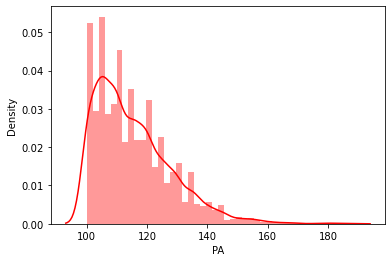

In [48]:
sns.distplot(df_goalkeepers_model.PA, color = 'Red')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Defenders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

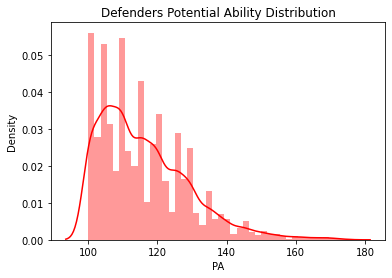

In [49]:
plt.title("Defenders Potential Ability Distribution")
sns.distplot(df_defenders_model.PA, color = 'Red')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Backs Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

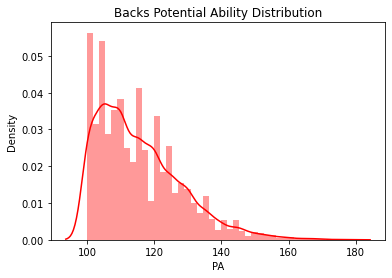

In [50]:
plt.title("Backs Potential Ability Distribution")
sns.distplot(df_backs_model.PA, color = 'Red')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Midfielders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

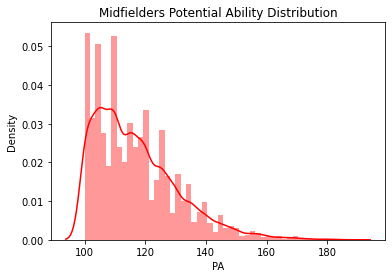

In [51]:
plt.title("Midfielders Potential Ability Distribution")
sns.distplot(df_midfielders_model.PA, color = 'Red')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Forwards Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

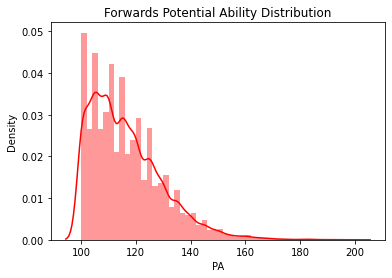

In [52]:
plt.title("Forwards Potential Ability Distribution")
sns.distplot(df_forwards_model.PA, color = 'Red')

In [53]:
df_goalkeepers_model.shape

(4904, 40)

In [54]:
df_defenders_model.shape

(7819, 42)

In [55]:
df_backs_model.shape

(7392, 42)

In [56]:
df_midfielders_model.shape

(13121, 42)

In [57]:
df_forwards_model.shape

(16764, 40)

In [58]:
df_forwards.groupby("Target").mean()

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\1186857047.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_forwards.groupby("Target").mean()


Height     Weight        Age          PA        Wor        Vis  \
Target                                                                       
0       178.860810  72.480490  24.511157  115.366419  10.697293   9.376539   
1       178.809392  73.127072  25.038674  158.881215  12.671271  12.353591   

              Tec        Tea        Str        Sta       Pos        Pen  \
Target                                                                    
0       11.476344   9.586758   8.929094  10.594074  7.170162   8.234484   
1       14.317680  11.784530  10.740331  12.425414  7.248619  12.035912   

              Pas        Pac        OtB        Nat        Lon       Ldr  \
Target                                                                    
0       10.118583  12.372577  11.542434  11.931960   8.890989  7.907755   
1       12.627072  13.980663  14.102210  13.055249  11.776243  8.944751   

             Jum       Hea        Fre        Fla        Fir        Fin  \
Target                                                                   
0       8.949214  9.285148   8.074686  11.275698  11.423973  10.563041   
1       9.693370  9.759669  10.511050  14.428177  13.856354  13.063536   

              Dri        Det        Dec        Cro       Cor        Cnt  \
Target                                                                    
0       11.490672  11.158700  10.317827   9.502317  8.053225   8.975430   
1       14.063536  13.726519  12.002762  11.508287  9.701657  11.265193   

              Cmp        Bra        Bal        Ant        Agi        Agg  \
Target                                                                     
0        9.947019   9.081575   9.693818  10.157176  11.865443   9.932874   
1       12.720994  11.569061  12.497238  12.740331  13.801105  11.074586   

              Acc  Preferred Foot_Left  Preferred Foot_Right  
Target                                                        
0       12.605780             0.260334              0.770943  
1       14.237569             0.400552              0.718232

In [59]:
df_forwards_model.isnull().sum()

Height                  0
Weight                  0
Age                     0
PA                      0
Wor                     0
Vis                     0
Tec                     0
Tea                     0
Str                     0
Sta                     0
Pos                     0
Pen                     0
Pas                     0
Pac                     0
OtB                     0
Nat                     0
Lon                     0
Ldr                     0
Jum                     0
Hea                     0
Fre                     0
Fla                     0
Fir                     0
Fin                     0
Dri                     0
Det                     0
Dec                     0
Cro                     0
Cor                     0
Cnt                     0
Cmp                     0
Bra                     0
Bal                     0
Ant                     0
Agi                     0
Agg                     0
Acc                     0
Target                  0
Preferred Fo

In [60]:
df.duplicated().sum()

0

# Model

In [61]:
df_forwards_model.head()

Height  Weight  Age   PA  Wor  Vis  Tec  Tea  Str  Sta  Pos  Pen  Pas  Pac  \
0     184      75   19  107    8    6   13    7    6    7    8    8    8   12   
1     167      68   26  108   12   10   11   11   10   14   10    7   12   13   
2     188      68   21  119   13   11    9    9    9   13   13   12    9   11   
3     184      73   22  105   13    9   12    8    6    9    7    6   10   12   
4     180      84   28  116   11   11   14   10    8   15   11    5   11   12   

   OtB  Nat  Lon  Ldr  Jum  Hea  Fre  Fla  Fir  Fin  Dri  Det  Dec  Cro  Cor  \
0   14   10    7   11    7   14    7   12   14   14   14    4   14    5    7   
1   12   12   11    3    7   10   10   11   12    8   10   11   10   12   11   
2   14   14   10    9    4   10    3   13   12   15   11   10   11    6    7   
3   10   16    8    4    6    7    7   11   11    7   13    6   13   12   14   
4   15   14   13   12    8   15   10   12   15   11   15    9   11   10   10   

   Cnt  Cmp  Bra  Bal  Ant  Agi  Agg  Acc  Target  Preferred Foot_Left  \
0    9    9    7    3    7   12    5   11       0                  0.0   
1   11   12   13   10   11   12   12   14       0                  0.0   
2   12   15    9   12   10   11    5   12       0                  0.0   
3    8   11    5    3    8   10   12   13       0                  1.0   
4   11   10    6   11   15   14   14   12       0                  0.0   

   Preferred Foot_Right  
0                   1.0  
1                   1.0  
2                   1.0  
3                   0.0  
4                   1.0

In [62]:
x = df_forwards_model.drop(["PA", "Target"], axis=1)
y = df_forwards_model["Target"]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

## Forwards

### Random Forest

In [64]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
rf_predicts= rf.predict(x_test)

In [66]:
rf_cm= confusion_matrix(y_test, rf_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_cm)


Random Forest Confusion Matrix:

[[5415    0]
 [  85   33]]


In [67]:
target_names = ['0', '1']
print(classification_report(y_test, rf_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       1.00      0.28      0.44       118

    accuracy                           0.98      5533
   macro avg       0.99      0.64      0.71      5533
weighted avg       0.98      0.98      0.98      5533



In [68]:
cv  = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

In [69]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_f1 = mean(scor)
print("Random Forest doğrulanmış f1 skoru:", rf_f1)

Random Forest doğrulanmış f1 skoru: 0.44104114916986203


In [70]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_brier = -1*mean(scor)
print("Random Forest doğrulanmış brier skoru:", rf_brier)

Random Forest doğrulanmış brier skoru: 0.01278536570837073


In [71]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = -1*[]
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_roc_auc = mean(scor)
print("Random Forest doğrulanmış roc-auc skoru:", rf_roc_auc)

Random Forest doğrulanmış roc-auc skoru: 0.6464475767927664


In [72]:
rf_class1_probs = rf.predict_proba(x_test)[:, 1]
rf_df_test_class1_probs = rf.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:,1]

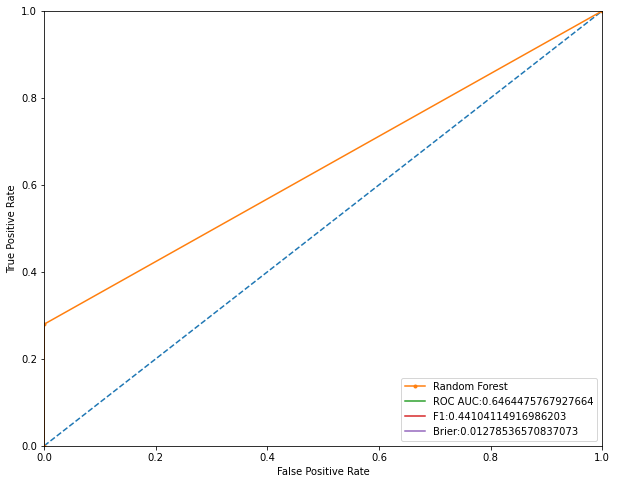

In [73]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, rf_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.plot(0, label = 'ROC AUC:'+str(rf_roc_auc))
plt.plot(0, label = 'F1:'+str(rf_f1))
plt.plot(0, label = 'Brier:'+str(rf_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [74]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    rf_thresh_predicts = rf_class1_probs > threshold
    precision = precision_score(y_test, rf_thresh_predicts)
    recall = recall_score(y_test, rf_thresh_predicts)
    f1 = f1_score(y_test, rf_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.053, Completeness = 0.966 | F1 = 0.100
Threshold = 0.01 | Accuracy = 0.085, Completeness = 0.941 | F1 = 0.156
Threshold = 0.02 | Accuracy = 0.115, Completeness = 0.924 | F1 = 0.205
Threshold = 0.03 | Accuracy = 0.146, Completeness = 0.915 | F1 = 0.251
Threshold = 0.04 | Accuracy = 0.180, Completeness = 0.915 | F1 = 0.300
Threshold = 0.05 | Accuracy = 0.207, Completeness = 0.890 | F1 = 0.335
Threshold = 0.06 | Accuracy = 0.233, Completeness = 0.873 | F1 = 0.367
Threshold = 0.07 | Accuracy = 0.261, Completeness = 0.873 | F1 = 0.402
Threshold = 0.08 | Accuracy = 0.289, Completeness = 0.839 | F1 = 0.430
Threshold = 0.09 | Accuracy = 0.314, Completeness = 0.814 | F1 = 0.453
Threshold = 0.10 | Accuracy = 0.333, Completeness = 0.797 | F1 = 0.470
Threshold = 0.11 | Accuracy = 0.351, Completeness = 0.771 | F1 = 0.483
Threshold = 0.12 | Accuracy = 0.387, Completeness = 0.771 | F1 = 0.516
Threshold = 0.13 | Accuracy = 0.413, Completeness = 0.763 | F1 = 0.536
Thresh

In [75]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    rf_thresh_predicts = rf_class1_probs > threshold
    f1 = f1_score(y_test, rf_thresh_predicts)
    if f1_list.max() == f1:
        rf_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", rf_best_threshold)

Maximum f1 score is: 0.639 and best threshold is: 0.25


In [76]:
def custom_predict_rf(X, threshold):
    
    return (rf_class1_probs > threshold).astype(int)
    
    
rf_thresh_predicts = custom_predict_rf(X = x_test, threshold = rf_best_threshold) 

In [77]:
rf_thresh_cm= confusion_matrix(y_test, rf_thresh_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_thresh_cm)


Random Forest Confusion Matrix:

[[5384   31]
 [  48   70]]


In [78]:
print(classification_report(y_test, rf_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.69      0.59      0.64       118

    accuracy                           0.99      5533
   macro avg       0.84      0.79      0.82      5533
weighted avg       0.98      0.99      0.99      5533



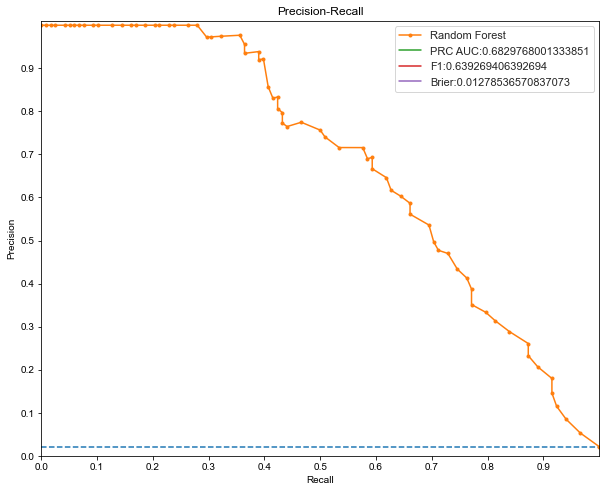

In [79]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, rf_class1_probs)
rf_thresh_f1, rf_prc_auc = f1_score(y_test, rf_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Random Forest')
plt.plot(0,label='PRC AUC:'+str(rf_prc_auc))

plt.plot(0,label='F1:'+str(rf_thresh_f1))
plt.plot(0,label='Brier:'+str(rf_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

#### Hyperparameter Tuning

In [80]:
rf_params = {
              
             "max_depth": [2,5,8,10],
             "min_samples_leaf":[1, 2, 3, 5, 10],
            "max_features": ['sqrt',5, 'auto'],
            "n_estimators": [200,500,750],
            "min_samples_split": [2,5,10]}

In [81]:
rf_tuned = RandomizedSearchCV(rf, 
                           rf_params, 
                           cv = cv,
                           n_iter=100,
                           scoring = 'f1',
                           n_jobs = -1, 
                           verbose = 2) 

In [82]:

rf_tuned.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
--- 179.1607060432434 seconds ---


In [83]:
print("En iyi parametreler: " + str(rf_tuned.best_params_))

En iyi parametreler: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 10}


In [84]:
rf_tuned= RandomForestClassifier(
                                 max_depth=rf_tuned.best_params_["max_depth"],
                                max_features=rf_tuned.best_params_["max_features"],
                                min_samples_leaf=rf_tuned.best_params_["min_samples_leaf"],
                                min_samples_split=rf_tuned.best_params_["min_samples_split"],
                                
                                n_estimators=rf_tuned.best_params_["n_estimators"])

In [85]:
rf_tuned.fit(x_train, y_train)

rf_tuned_predicts= rf_tuned.predict(x_test)

rf_tuned_class1_probs =rf_tuned.predict_proba(x_test)[:, 1]

rf_tuned_df_test_class1_probs = rf_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:,1]

In [86]:
rf_tuned_cm= confusion_matrix(y_test, rf_tuned_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_tuned_cm)


Random Forest Confusion Matrix:

[[5415    0]
 [  89   29]]


In [87]:
print(classification_report(y_test, rf_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       1.00      0.25      0.39       118

    accuracy                           0.98      5533
   macro avg       0.99      0.62      0.69      5533
weighted avg       0.98      0.98      0.98      5533



In [88]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_f1 = mean(scor)
print("Random Forest doğrulanmış f1 skoru:", rf_tuned_f1)

Random Forest doğrulanmış f1 skoru: 0.4062139853092234


In [89]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_brier = -1*mean(scor)
print("Random Forest doğrulanmış brier skoru:", rf_tuned_brier)

Random Forest doğrulanmış brier skoru: 0.013139214274452091


In [90]:
scores = []
for i in range(1,2):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_roc_auc = mean(scor)
print("Random Forest doğrulanmış roc-auc skoru:", rf_tuned_roc_auc)

Random Forest doğrulanmış roc-auc skoru: 0.62995408734879


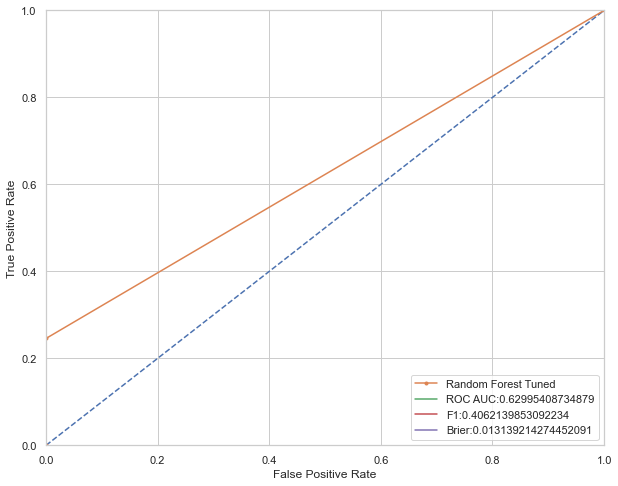

In [91]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Random Forest Tuned')
plt.plot(0, label = 'ROC AUC:'+str(rf_tuned_roc_auc))


plt.plot(0, label = 'F1:'+str(rf_tuned_f1))
plt.plot(0, label = 'Brier:'+str(rf_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [92]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    rf_tuned_thresh_predicts = rf_tuned_class1_probs > threshold
    precision = precision_score(y_test, rf_tuned_thresh_predicts)
    recall = recall_score(y_test, rf_tuned_thresh_predicts)
    f1 = f1_score(y_test, rf_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.072, Completeness = 0.966 | F1 = 0.134
Threshold = 0.02 | Accuracy = 0.120, Completeness = 0.949 | F1 = 0.213
Threshold = 0.03 | Accuracy = 0.154, Completeness = 0.907 | F1 = 0.263
Threshold = 0.04 | Accuracy = 0.190, Completeness = 0.907 | F1 = 0.315
Threshold = 0.05 | Accuracy = 0.216, Completeness = 0.856 | F1 = 0.345
Threshold = 0.06 | Accuracy = 0.235, Completeness = 0.814 | F1 = 0.364
Threshold = 0.07 | Accuracy = 0.266, Completeness = 0.805 | F1 = 0.400
Threshold = 0.08 | Accuracy = 0.299, Completeness = 0.788 | F1 = 0.434
Threshold = 0.09 | Accuracy = 0.329, Completeness = 0.780 | F1 = 0.462
Threshold = 0.10 | Accuracy = 0.351, Completeness = 0.746 | F1 = 0.477
Threshold = 0.11 | Accuracy = 0.380, Completeness = 0.737 | F1 = 0.501
Threshold = 0.12 | Accuracy = 0.400, Completeness = 0.712 | F1 = 0.512
Threshold = 0.13 | Accuracy = 0.421, Completeness = 0.695 | F1 = 0.524
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [93]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    rf_tuned_thresh_predicts = rf_tuned_class1_probs > threshold
    f1 = f1_score(y_test, rf_tuned_thresh_predicts)
    if f1_list.max() == f1:
        rf_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", rf_tuned_best_threshold)

Maximum f1 score is: 0.622 and best threshold is: 0.22


In [94]:
def custom_predict_rf_tuned(X, threshold):
    
    return (rf_tuned_class1_probs > threshold).astype(int)
    
    
rf_tuned_thresh_predicts = custom_predict_rf_tuned(X = x_test, threshold = rf_tuned_best_threshold) 

In [95]:
rf_tuned_thresh_cm= confusion_matrix(y_test, rf_tuned_thresh_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_tuned_thresh_cm)


Random Forest Confusion Matrix:

[[5380   35]
 [  49   69]]


In [96]:
print(classification_report(y_test, rf_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.66      0.58      0.62       118

    accuracy                           0.98      5533
   macro avg       0.83      0.79      0.81      5533
weighted avg       0.98      0.98      0.98      5533



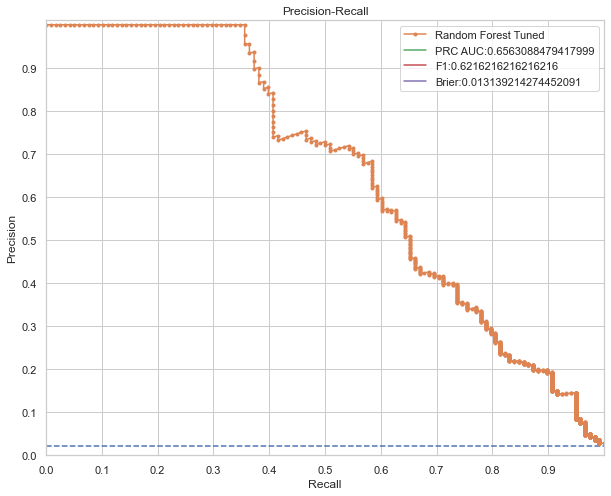

In [97]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, rf_tuned_class1_probs)
rf_tuned_thresh_f1, rf_tuned_prc_auc = f1_score(y_test, rf_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Random Forest Tuned')
plt.plot(0,label='PRC AUC:'+str(rf_tuned_prc_auc))

plt.plot(0,label='F1:'+str(rf_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(rf_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [98]:
rf_df_test_f1 = f1_score(df_forwards_model_test.Target, rf.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(rf_df_test_f1)

def custom_predict_rf_df_test(X, threshold):
    
    return (rf_df_test_class1_probs > threshold).astype(int)
    
rf_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_rf_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = rf_best_threshold))

print(rf_df_test_thresh_f1)

rf_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, rf_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(rf_tuned_df_test_f1)

def custom_predict_rf_tuned_df_test(X, threshold):
    
    return (rf_tuned_df_test_class1_probs > threshold).astype(int)
    
rf_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_rf_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = rf_tuned_best_threshold))

print(rf_tuned_thresh_df_test_f1)

0.4203821656050956
0.587719298245614
0.3684210526315789
0.6000000000000001


### Bagging

In [99]:
bag = BaggingClassifier().fit(x_train, y_train)

In [100]:
bag_predicts= bag.predict(x_test)

In [101]:
bag_cm= confusion_matrix(y_test, bag_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_cm)


Bagging Classifier Confusion Matrix:

[[5409    6]
 [  76   42]]


In [102]:
print(classification_report(y_test, bag_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.88      0.36      0.51       118

    accuracy                           0.99      5533
   macro avg       0.93      0.68      0.75      5533
weighted avg       0.98      0.99      0.98      5533



In [103]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_f1 = mean(scor)
print("Bagging doğrulanmış f1 skoru:", bag_f1)

Bagging doğrulanmış f1 skoru: 0.4485423565615394


In [104]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_brier = -1*mean(scor)
print("Bagging doğrulanmış brier skoru:", bag_brier)

Bagging doğrulanmış brier skoru: 0.014277252070777641


In [105]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_roc_auc = mean(scor)
print("Bagging doğrulanmış roc-auc skoru:", bag_roc_auc)

Bagging doğrulanmış roc-auc skoru: 0.6547991843207429


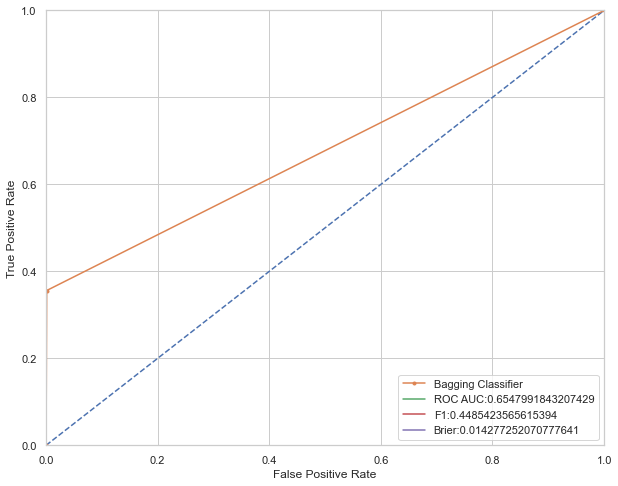

In [106]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, bag_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Bagging Classifier')
plt.plot(0, label = 'ROC AUC:'+str(bag_roc_auc))

plt.plot(0, label = 'F1:'+str(bag_f1))
plt.plot(0, label = 'Brier:'+str(bag_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [107]:
bag_class1_probs = bag.predict_proba(x_test)[:, 1]

f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    bag_thresh_predicts = bag_class1_probs > threshold
    precision = precision_score(y_test, bag_thresh_predicts)
    recall = recall_score(y_test, bag_thresh_predicts)
    f1 = f1_score(y_test, bag_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.01 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.02 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.03 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.04 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.05 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.06 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.07 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.08 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.09 | Accuracy = 0.165, Completeness = 0.864 | F1 = 0.277
Threshold = 0.10 | Accuracy = 0.319, Completeness = 0.771 | F1 = 0.452
Threshold = 0.11 | Accuracy = 0.319, Completeness = 0.771 | F1 = 0.452
Threshold = 0.12 | Accuracy = 0.319, Completeness = 0.771 | F1 = 0.452
Threshold = 0.13 | Accuracy = 0.319, Completeness = 0.771 | F1 = 0.452
Thresh

In [108]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    bag_thresh_predicts = bag_class1_probs > threshold
    f1 = f1_score(y_test, bag_thresh_predicts)
    if f1_list.max() == f1:
        bag_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", bag_best_threshold)

Maximum f1 score is: 0.575 and best threshold is: 0.39


In [109]:
def custom_predict_bag(X, threshold):
     
    return (bag_class1_probs > threshold).astype(int)
    
    
bag_thresh_predicts = custom_predict_bag(X = x_test, threshold = bag_best_threshold) 

In [110]:
bag_thresh_cm= confusion_matrix(y_test, bag_thresh_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_thresh_cm)


Bagging Classifier Confusion Matrix:

[[5377   38]
 [  55   63]]


In [111]:
print(classification_report(y_test, bag_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.62      0.53      0.58       118

    accuracy                           0.98      5533
   macro avg       0.81      0.76      0.78      5533
weighted avg       0.98      0.98      0.98      5533



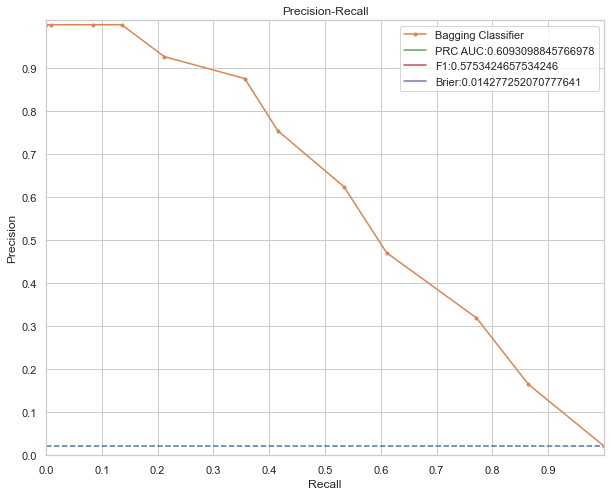

In [112]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, bag_class1_probs)
bag_thresh_f1, bag_prc_auc = f1_score(y_test, bag_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Bagging Classifier')
plt.plot(0,label='PRC AUC:'+str(bag_prc_auc))

plt.plot(0,label='F1:'+str(bag_thresh_f1))
plt.plot(0,label='Brier:'+str(bag_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

#### Hyperparameter Tuning

In [113]:
bag_params = {
              "max_samples":[1,2,3,5],
              
            "max_features": [2,5,8, 10],
            "n_estimators": [5,10,100,250,]
            }

In [114]:
bag_tuned = GridSearchCV(bag, 
                           bag_params, 
                           cv = cv,
                         scoring='f1',
                           n_jobs = -1, 
                           verbose = 2) 

In [115]:

bag_tuned.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
--- 356.2558252811432 seconds ---


In [116]:
print("En iyi parametreler: " + str(bag_tuned.best_params_))

En iyi parametreler: {'max_features': 2, 'max_samples': 1, 'n_estimators': 5}


In [117]:
bag_tuned= BaggingClassifier(max_samples=bag_tuned.best_params_["max_samples"],
                                max_features=bag_tuned.best_params_["max_features"],
                                n_estimators=bag_tuned.best_params_["n_estimators"])
bag_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=2, max_samples=1, n_estimators=5)

In [118]:
bag_tuned_predicts= bag_tuned.predict(x_test)

In [119]:
bag_tuned_cm= confusion_matrix(y_test, bag_tuned_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_tuned_cm)


Bagging Classifier Confusion Matrix:

[[5415    0]
 [ 118    0]]


In [120]:
print(classification_report(y_test, bag_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       0.00      0.00      0.00       118

    accuracy                           0.98      5533
   macro avg       0.49      0.50      0.49      5533
weighted avg       0.96      0.98      0.97      5533



C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
bag_tuned_class1_probs =bag_tuned.predict_proba(x_test)[:, 1]

In [122]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_f1 = mean(scor)
print("Bagging doğrulanmış f1 skoru:", bag_tuned_f1)

Bagging doğrulanmış f1 skoru: 0.0


In [123]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_brier = -1*mean(scor)
print("Bagging doğrulanmış brier skoru:", bag_tuned_brier)

Bagging doğrulanmış brier skoru: 0.024734952562696325


In [124]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_roc_auc = mean(scor)
print("Bagging doğrulanmış roc-auc skoru:", bag_tuned_roc_auc)

Bagging doğrulanmış roc-auc skoru: 0.5


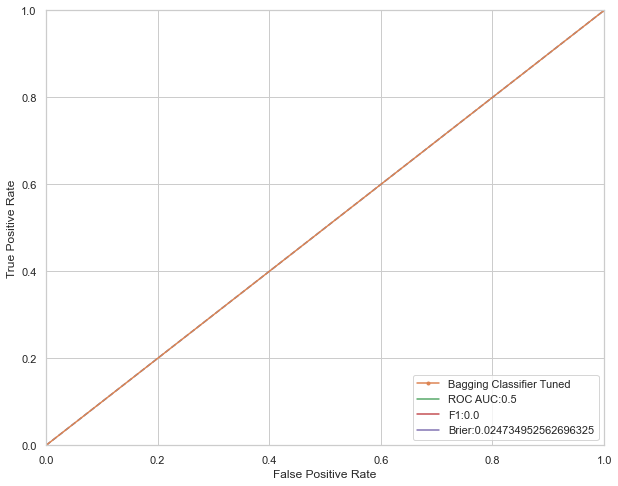

In [125]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, bag_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Bagging Classifier Tuned')
plt.plot(0, label = 'ROC AUC:'+str(bag_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(bag_tuned_f1))
plt.plot(0, label = 'Brier:'+str(bag_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [126]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    bag_tuned_thresh_predicts = bag_tuned_class1_probs > threshold
    precision = precision_score(y_test, bag_tuned_thresh_predicts)
    recall = recall_score(y_test, bag_tuned_thresh_predicts)
    f1 = f1_score(y_test, bag_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.01 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.02 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.03 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.04 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.05 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.06 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.07 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000


C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

Threshold = 0.08 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.09 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.10 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.11 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.12 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.13 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.14 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.15 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.16 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.17 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.18 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.19 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.20 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.21 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [127]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    bag_tuned_thresh_predicts = bag_tuned_class1_probs > threshold
    f1 = f1_score(y_test, bag_tuned_thresh_predicts)
    if f1_list.max() == f1:
        bag_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", bag_tuned_best_threshold)

Maximum f1 score is: 0.000 and best threshold is: 0.9400000000000001


In [128]:
def custom_predict_bag_tuned(X, threshold):

    return (bag_tuned_class1_probs > threshold).astype(int)
    
    
bag_tuned_thresh_predicts = custom_predict_bag_tuned(X = x_test, threshold = bag_tuned_best_threshold) 

In [129]:
bag_tuned_thresh_cm= confusion_matrix(y_test, bag_tuned_thresh_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_tuned_thresh_cm)


Bagging Classifier Confusion Matrix:

[[5415    0]
 [ 118    0]]


In [130]:
print(classification_report(y_test, bag_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       0.00      0.00      0.00       118

    accuracy                           0.98      5533
   macro avg       0.49      0.50      0.49      5533
weighted avg       0.96      0.98      0.97      5533



C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


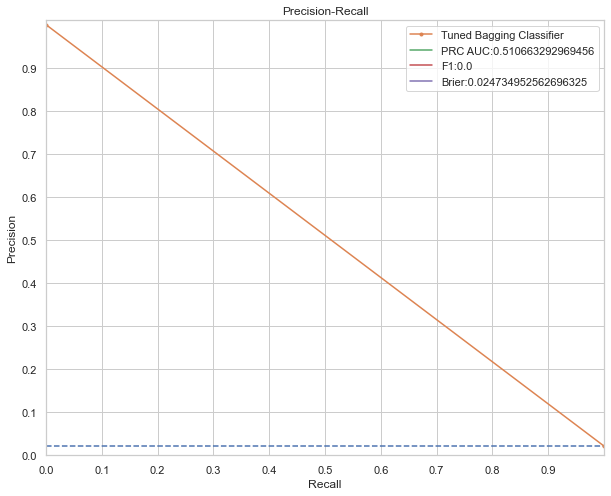

In [131]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, bag_tuned_class1_probs)
bag_tuned_thresh_f1, bag_tuned_prc_auc = f1_score(y_test, bag_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Tuned Bagging Classifier')
plt.plot(0,label='PRC AUC:'+str(bag_tuned_prc_auc))

plt.plot(0,label='F1:'+str(bag_tuned_thresh_f1))
plt.plot(0, label = 'Brier:'+str(bag_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [132]:
bag_tuned_df_test_class1_probs = bag_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
bag_df_test_class1_probs = bag.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

bag_df_test_f1 = f1_score(df_forwards_model_test.Target, bag.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(bag_df_test_f1)

def custom_predict_bag_df_test(X, threshold):
    
    return (bag_df_test_class1_probs > threshold).astype(int)
    
bag_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_bag_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = bag_best_threshold))

print(bag_df_test_thresh_f1)

bag_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, bag_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(bag_tuned_df_test_f1)

def custom_predict_bag_tuned_df_test(X, threshold):
    
    return (bag_tuned_df_test_class1_probs > threshold).astype(int)
    
bag_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_bag_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = bag_tuned_best_threshold))

print(bag_tuned_thresh_df_test_f1)

0.4534883720930233
0.5855855855855857
0.0
0.0


### Gradient Boosting

In [133]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [134]:
gbc_predicts= gbc.predict(x_test)
gbc_cm= confusion_matrix(y_test, gbc_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_cm)


Gradient Boosting Confusion Matrix:

[[5398   17]
 [  61   57]]


In [135]:
print(classification_report(y_test, gbc_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.77      0.48      0.59       118

    accuracy                           0.99      5533
   macro avg       0.88      0.74      0.79      5533
weighted avg       0.98      0.99      0.98      5533



In [136]:
gbc_class1_probs = gbc.predict_proba(x_test)[:,1]

In [137]:
gbc_f1 = cross_val_score(gbc, x, y, cv=cv, scoring='f1').mean()
print("Gradient Boosting doğrulanmış f1 skoru:", gbc_f1)

Gradient Boosting doğrulanmış f1 skoru: 0.5311129132629595


In [138]:
gbc_brier = -1*cross_val_score(gbc, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Gradient Boosting doğrulanmış brier skoru:", gbc_brier)

Gradient Boosting doğrulanmış brier skoru: 0.012693949878996361


In [139]:
gbc_roc_auc = cross_val_score(gbc, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Gradient Boosting doğrulanmış roc-auc skoru:", gbc_roc_auc)

Gradient Boosting doğrulanmış roc-auc skoru: 0.7111161323801616


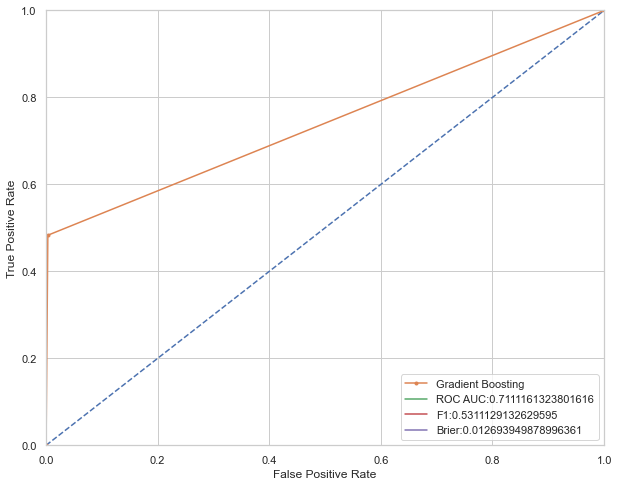

In [140]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, gbc_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting')
plt.plot(0, label = 'ROC AUC:'+str(gbc_roc_auc))

plt.plot(0, label = 'F1:'+str(gbc_f1))
plt.plot(0, label = 'Brier:'+str(gbc_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [141]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    gbc_thresh_predicts = gbc_class1_probs > threshold
    precision = precision_score(y_test, gbc_thresh_predicts)
    recall = recall_score(y_test, gbc_thresh_predicts)
    f1 = f1_score(y_test, gbc_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.134, Completeness = 0.907 | F1 = 0.233
Threshold = 0.02 | Accuracy = 0.222, Completeness = 0.873 | F1 = 0.353
Threshold = 0.03 | Accuracy = 0.270, Completeness = 0.814 | F1 = 0.406
Threshold = 0.04 | Accuracy = 0.325, Completeness = 0.805 | F1 = 0.463
Threshold = 0.05 | Accuracy = 0.365, Completeness = 0.771 | F1 = 0.496
Threshold = 0.06 | Accuracy = 0.403, Completeness = 0.754 | F1 = 0.525
Threshold = 0.07 | Accuracy = 0.435, Completeness = 0.737 | F1 = 0.547
Threshold = 0.08 | Accuracy = 0.450, Completeness = 0.720 | F1 = 0.554
Threshold = 0.09 | Accuracy = 0.472, Completeness = 0.720 | F1 = 0.570
Threshold = 0.10 | Accuracy = 0.503, Completeness = 0.712 | F1 = 0.589
Threshold = 0.11 | Accuracy = 0.512, Completeness = 0.703 | F1 = 0.593
Threshold = 0.12 | Accuracy = 0.532, Completeness = 0.703 | F1 = 0.606
Threshold = 0.13 | Accuracy = 0.550, Completeness = 0.695 | F1 = 0.614
Thresh

In [142]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    gbc_thresh_predicts = gbc_class1_probs > threshold
    f1 = f1_score(y_test, gbc_thresh_predicts)
    if f1_list.max() == f1:
        gbc_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", gbc_best_threshold)

Maximum f1 score is: 0.637 and best threshold is: 0.16


In [143]:
def custom_predict_gbc(X, threshold):
    
    return (gbc_class1_probs > threshold).astype(int)
    
    
gbc_thresh_predicts = custom_predict_gbc(X = x_test, threshold = gbc_best_threshold) 

gbc_thresh_cm= confusion_matrix(y_test, gbc_thresh_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_thresh_cm)


Gradient Boosting Confusion Matrix:

[[5364   51]
 [  39   79]]


In [144]:
print(classification_report(y_test, gbc_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.61      0.67      0.64       118

    accuracy                           0.98      5533
   macro avg       0.80      0.83      0.81      5533
weighted avg       0.98      0.98      0.98      5533



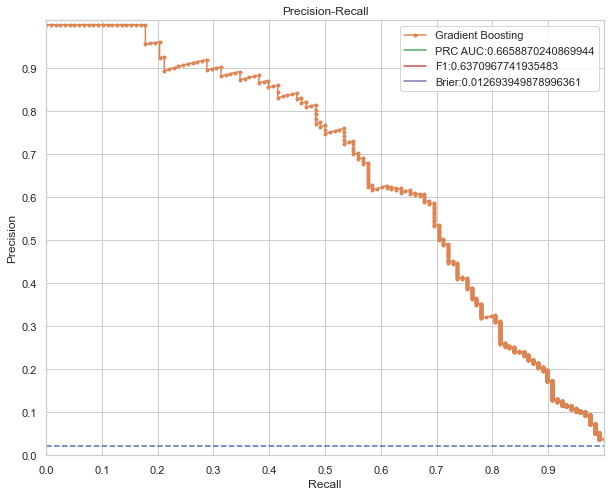

In [145]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, gbc_class1_probs)
gbc_thresh_f1, gbc_prc_auc = f1_score(y_test, gbc_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Gradient Boosting')
plt.plot(0,label='PRC AUC:'+str(gbc_prc_auc))

plt.plot(0,label='F1:'+str(gbc_thresh_f1))
plt.plot(0,label='Brier:'+str(gbc_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

#### Hyperparameter Tuning

In [146]:

gbc_params = {"learning_rate" : [0.001, 0.01, 0.1],
             "n_estimators": [100,500,1000],
             
             "max_depth": [3,5,10],
             }

gbc_tuned = GridSearchCV(gbc, 
                           gbc_params, 
                           cv = cv,
                             
                           n_jobs = -1, 
                           verbose = 2,
                              scoring='f1') 

gbc_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(gbc_tuned.best_params_))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}


In [147]:
gbc_tuned= GradientBoostingClassifier(learning_rate=gbc_tuned.best_params_["learning_rate"],
                                
                                
                                n_estimators=gbc_tuned.best_params_["n_estimators"],
                                
                                
                                
                                max_depth=gbc_tuned.best_params_["max_depth"],
                                )
gbc_tuned.fit(x_train, y_train)

gbc_tuned_predicts= gbc_tuned.predict(x_test)

gbc_tuned_class1_probs =gbc_tuned.predict_proba(x_test)[:, 1]

In [148]:
gbc_tuned_cm= confusion_matrix(y_test, gbc_tuned_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_tuned_cm)


Gradient Boosting Confusion Matrix:

[[5406    9]
 [  59   59]]


In [149]:
print(classification_report(y_test, gbc_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.87      0.50      0.63       118

    accuracy                           0.99      5533
   macro avg       0.93      0.75      0.81      5533
weighted avg       0.99      0.99      0.99      5533



In [150]:
gbc_tuned_f1 = cross_val_score(gbc_tuned, x, y, cv=cv, scoring='f1').mean()
print("Gradient Boosting doğrulanmış f1 skoru:", gbc_tuned_f1)

Gradient Boosting doğrulanmış f1 skoru: 0.5851976934574022


In [151]:
gbc_tuned_brier = -1*cross_val_score(gbc_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Gradient Boosting doğrulanmış brier skoru:", gbc_tuned_brier)

Gradient Boosting doğrulanmış brier skoru: 0.01321604598964531


In [152]:
gbc_tuned_roc_auc = cross_val_score(gbc_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Gradient Boosting doğrulanmış roc-auc skoru:", gbc_tuned_roc_auc)

Gradient Boosting doğrulanmış roc-auc skoru: 0.7399363609713825


In [153]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1210.0841608047485 seconds ---


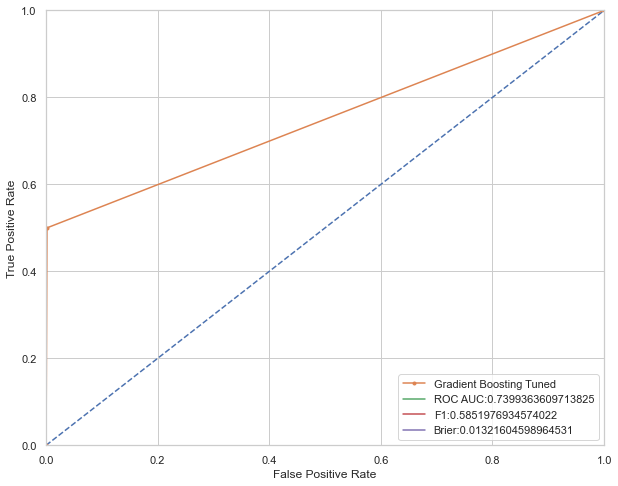

In [154]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, gbc_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting Tuned')
plt.plot(0, label = 'ROC AUC:'+str(gbc_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(gbc_tuned_f1))
plt.plot(0, label = 'Brier:'+str(gbc_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [155]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    gbc_tuned_thresh_predicts = gbc_tuned_class1_probs > threshold
    precision = precision_score(y_test, gbc_tuned_thresh_predicts)
    recall = recall_score(y_test, gbc_tuned_thresh_predicts)
    f1 = f1_score(y_test, gbc_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.344, Completeness = 0.805 | F1 = 0.482
Threshold = 0.02 | Accuracy = 0.419, Completeness = 0.771 | F1 = 0.543
Threshold = 0.03 | Accuracy = 0.476, Completeness = 0.754 | F1 = 0.584
Threshold = 0.04 | Accuracy = 0.515, Completeness = 0.720 | F1 = 0.601
Threshold = 0.05 | Accuracy = 0.553, Completeness = 0.703 | F1 = 0.619
Threshold = 0.06 | Accuracy = 0.568, Completeness = 0.703 | F1 = 0.629
Threshold = 0.07 | Accuracy = 0.594, Completeness = 0.695 | F1 = 0.641
Threshold = 0.08 | Accuracy = 0.612, Completeness = 0.669 | F1 = 0.640
Threshold = 0.09 | Accuracy = 0.627, Completeness = 0.669 | F1 = 0.648
Threshold = 0.10 | Accuracy = 0.639, Completeness = 0.661 | F1 = 0.650
Threshold = 0.11 | Accuracy = 0.664, Completeness = 0.653 | F1 = 0.658
Threshold = 0.12 | Accuracy = 0.675, Completeness = 0.653 | F1 = 0.664
Threshold = 0.13 | Accuracy = 0.675, Completeness = 0.653 | F1 = 0.664
Thresh

In [156]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    gbc_tuned_thresh_predicts = gbc_tuned_class1_probs > threshold
    f1 = f1_score(y_test, gbc_tuned_thresh_predicts)
    if f1_list.max() == f1:
        gbc_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", gbc_tuned_best_threshold)

Maximum f1 score is: 0.676 and best threshold is: 0.21


In [157]:
def custom_predict_gbc_tuned(X, threshold):
    
    return (gbc_tuned_class1_probs > threshold).astype(int)
    
    
gbc_tuned_thresh_predicts = custom_predict_gbc_tuned(X = x_test, threshold = gbc_tuned_best_threshold) 

In [158]:
gbc_tuned_thresh_cm= confusion_matrix(y_test, gbc_tuned_thresh_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_tuned_thresh_cm)


Gradient Boosting Confusion Matrix:

[[5388   27]
 [  44   74]]


In [159]:
print(classification_report(y_test, gbc_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.73      0.63      0.68       118

    accuracy                           0.99      5533
   macro avg       0.86      0.81      0.83      5533
weighted avg       0.99      0.99      0.99      5533



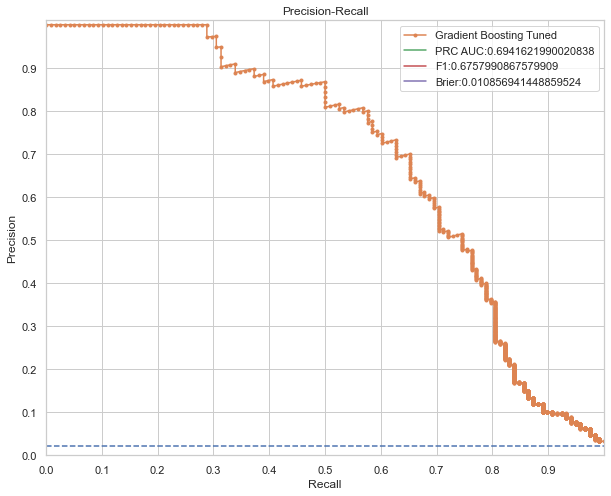

In [160]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, gbc_tuned_class1_probs)
gbc_tuned_thresh_f1, gbc_tuned_prc_auc = f1_score(y_test, gbc_tuned_thresh_predicts), auc(recall, precision)

gbc_tuned_brier = brier_score_loss(y_test, gbc_tuned_class1_probs)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Gradient Boosting Tuned')
plt.plot(0,label='PRC AUC:'+str(gbc_tuned_prc_auc))

plt.plot(0,label='F1:'+str(gbc_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(gbc_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [161]:
gbc_tuned_df_test_class1_probs = gbc_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
gbc_df_test_class1_probs = gbc.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

gbc_df_test_f1 = f1_score(df_forwards_model_test.Target, gbc.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(gbc_df_test_f1)

def custom_predict_gbc_df_test(X, threshold):
    
    return (gbc_df_test_class1_probs > threshold).astype(int)
    
gbc_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_gbc_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = gbc_best_threshold))

print(gbc_df_test_thresh_f1)

gbc_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, gbc_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(gbc_tuned_df_test_f1)

def custom_predict_gbc_tuned_df_test(X, threshold):
    
    return (gbc_tuned_df_test_class1_probs > threshold).astype(int)
    
gbc_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_gbc_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = gbc_tuned_best_threshold))

print(gbc_tuned_thresh_df_test_f1)

0.48087431693989063
0.5806451612903225
0.58
0.5964912280701755


### Ada Boost

In [162]:
ada= AdaBoostClassifier()
ada.fit(x_train, y_train)

ada_predicts= ada.predict(x_test)
ada_cm= confusion_matrix(y_test, ada_predicts)
print("\nAda Boost Confusion Matrix:\n")
print(ada_cm)


Ada Boost Confusion Matrix:

[[5395   20]
 [  59   59]]


In [163]:
print(classification_report(y_test, ada_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.75      0.50      0.60       118

    accuracy                           0.99      5533
   macro avg       0.87      0.75      0.80      5533
weighted avg       0.98      0.99      0.98      5533



In [164]:

ada_f1 = cross_val_score(ada, x, y, cv=cv, scoring='f1').mean()
print("Ada Boost doğrulanmış f1 skoru:", ada_f1)

Ada Boost doğrulanmış f1 skoru: 0.5250880452320318


In [165]:
ada_brier = -1*cross_val_score(ada, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Ada Boost doğrulanmış brier skoru:", ada_brier)

Ada Boost doğrulanmış brier skoru: 0.20704294614243773


In [166]:
ada_roc_auc = cross_val_score(ada, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Ada Boost doğrulanmış roc-auc skoru:", ada_roc_auc)
print("--- %s seconds ---" % (time.time() - start_time))

Ada Boost doğrulanmış roc-auc skoru: 0.7211224806842411
--- 1224.8438782691956 seconds ---


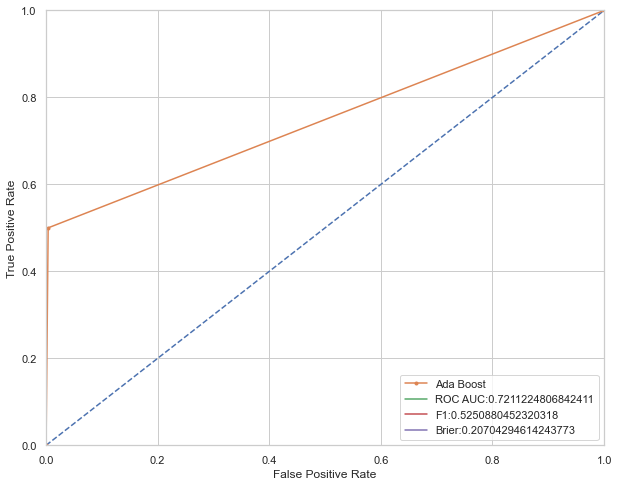

In [167]:
ada_class1_probs = ada.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, ada_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Ada Boost')
plt.plot(0, label = 'ROC AUC:'+str(ada_roc_auc))

plt.plot(0, label = 'F1:'+str(ada_f1))
plt.plot(0, label = 'Brier:'+str(ada_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [168]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    ada_thresh_predicts = ada_class1_probs > threshold
    precision = precision_score(y_test, ada_thresh_predicts)
    recall = recall_score(y_test, ada_thresh_predicts)
    f1 = f1_score(y_test, ada_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.02 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.03 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.04 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.05 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.06 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.07 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.08 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.09 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.10 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.11 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.12 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.13 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [169]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    ada_thresh_predicts = ada_class1_probs > threshold
    f1 = f1_score(y_test, ada_thresh_predicts)
    if f1_list.max() == f1:
        ada_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", ada_best_threshold)

Maximum f1 score is: 0.599 and best threshold is: 0.5


In [170]:
def custom_predict_ada(X, threshold):
    
    return (ada_class1_probs > threshold).astype(int)
    
    
ada_thresh_predicts = custom_predict_ada(X = x_test, threshold = ada_best_threshold) 

ada_thresh_cm= confusion_matrix(y_test, ada_thresh_predicts)
print("\nAda Boost Confusion Matrix:\n")
print(ada_thresh_cm)


Ada Boost Confusion Matrix:

[[5395   20]
 [  59   59]]


In [171]:
print(classification_report(y_test, ada_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.75      0.50      0.60       118

    accuracy                           0.99      5533
   macro avg       0.87      0.75      0.80      5533
weighted avg       0.98      0.99      0.98      5533



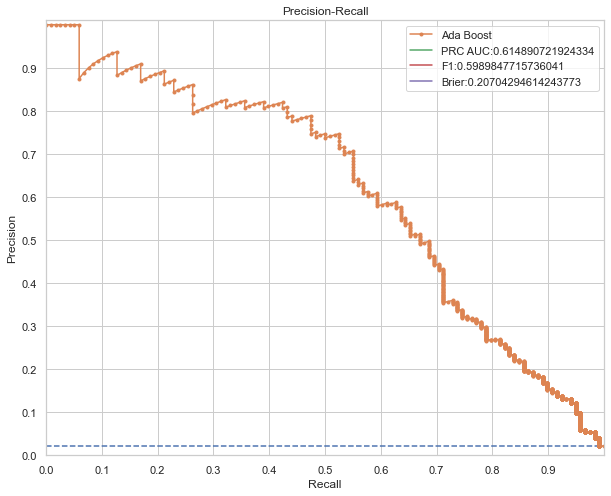

In [172]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, ada_class1_probs)
ada_thresh_f1, ada_prc_auc = f1_score(y_test, ada_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Ada Boost')
plt.plot(0,label='PRC AUC:'+str(ada_prc_auc))

plt.plot(0,label='F1:'+str(ada_thresh_f1))
plt.plot(0,label='Brier:'+str(ada_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

#### Hyperparameter Tuning

In [173]:


ada_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [1, 25, 50,100,250, 500,1000]
             
             }

ada_tuned = GridSearchCV(ada, 
                           ada_params, 
                           cv = cv, 
                           
                               scoring='f1',
                               
                           n_jobs = -1, 
                           verbose = 2) 

ada_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(ada_tuned.best_params_))

ada_tuned= AdaBoostClassifier(learning_rate=ada_tuned.best_params_["learning_rate"],
                                
                                n_estimators=ada_tuned.best_params_["n_estimators"])

ada_tuned.fit(x_train, y_train)

ada_tuned_predicts= ada_tuned.predict(x_test)

ada_tuned_class1_probs =ada_tuned.predict_proba(x_test)[:, 1]

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
En iyi parametreler: {'learning_rate': 0.1, 'n_estimators': 1000}
--- 1299.7922503948212 seconds ---


In [174]:
ada_tuned_cm= confusion_matrix(y_test, ada_tuned_predicts)
print("\nAda Boost Confusion Matrix:\n")
print(ada_tuned_cm)

print(classification_report(y_test, ada_tuned_predicts, target_names=target_names))


Ada Boost Confusion Matrix:

[[5405   10]
 [  61   57]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.85      0.48      0.62       118

    accuracy                           0.99      5533
   macro avg       0.92      0.74      0.80      5533
weighted avg       0.99      0.99      0.99      5533



In [175]:

ada_tuned_f1 = cross_val_score(ada_tuned, x, y, cv=cv, scoring='f1').mean()
print("Ada Boost doğrulanmış f1 skoru:", ada_tuned_f1)

Ada Boost doğrulanmış f1 skoru: 0.5873249673235736


In [176]:
ada_tuned_brier = -1*cross_val_score(ada_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Ada Boost doğrulanmış brier skoru:", ada_tuned_brier)

Ada Boost doğrulanmış brier skoru: 0.2278069951506388


In [177]:
ada_tuned_roc_auc = cross_val_score(ada_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Ada Boost doğrulanmış roc-auc skoru:", ada_tuned_roc_auc)
print("--- %s seconds ---" % (time.time() - start_time))

Ada Boost doğrulanmış roc-auc skoru: 0.7363792090871792
--- 1551.2393887043 seconds ---


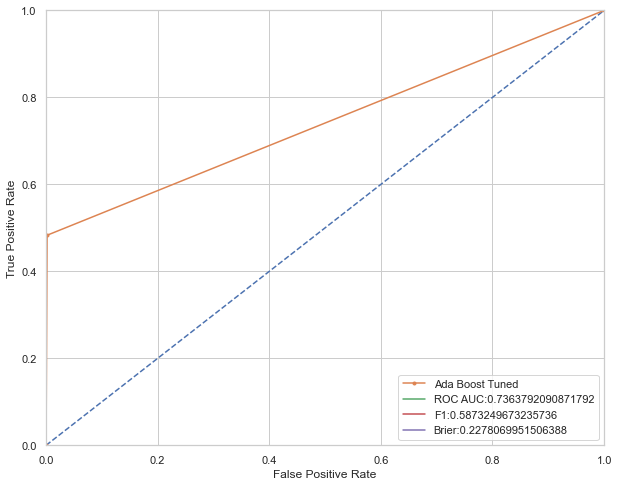

In [178]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, ada_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Ada Boost Tuned')
plt.plot(0, label = 'ROC AUC:'+str(ada_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(ada_tuned_f1))
plt.plot(0, label = 'Brier:'+str(ada_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [179]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    ada_tuned_thresh_predicts = ada_tuned_class1_probs > threshold
    precision = precision_score(y_test, ada_tuned_thresh_predicts)
    recall = recall_score(y_test, ada_tuned_thresh_predicts)
    f1 = f1_score(y_test, ada_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.02 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.03 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.04 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.05 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.06 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.07 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.08 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.09 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.10 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.11 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.12 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.13 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

Threshold = 0.89 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.90 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.91 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.92 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.93 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.94 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000


C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    ada_tuned_thresh_predicts = ada_tuned_class1_probs > threshold
    f1 = f1_score(y_test, ada_tuned_thresh_predicts)
    if f1_list.max() == f1:
        ada_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", ada_tuned_best_threshold)

Maximum f1 score is: 0.616 and best threshold is: 0.5


In [181]:
def custom_predict_ada_tuned(X, threshold):
    
    return (ada_tuned_class1_probs > threshold).astype(int)
    
    
ada_tuned_thresh_predicts = custom_predict_ada_tuned(X = x_test, threshold = ada_tuned_best_threshold) 

ada_tuned_thresh_cm= confusion_matrix(y_test, ada_tuned_thresh_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(ada_tuned_thresh_cm)


Gradient Boosting Confusion Matrix:

[[5405   10]
 [  61   57]]


In [182]:
print(classification_report(y_test, ada_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.85      0.48      0.62       118

    accuracy                           0.99      5533
   macro avg       0.92      0.74      0.80      5533
weighted avg       0.99      0.99      0.99      5533



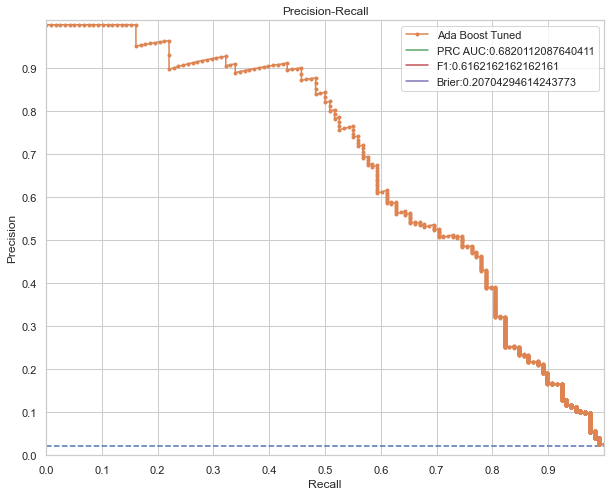

In [183]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, ada_tuned_class1_probs)
ada_tuned_thresh_f1, ada_tuned_prc_auc = f1_score(y_test, ada_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Ada Boost Tuned')
plt.plot(0,label='PRC AUC:'+str(ada_tuned_prc_auc))

plt.plot(0,label='F1:'+str(ada_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(ada_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [184]:
ada_tuned_df_test_class1_probs = ada_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
ada_df_test_class1_probs = ada.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

ada_df_test_f1 = f1_score(df_forwards_model_test.Target, ada.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(ada_df_test_f1)

def custom_predict_ada_df_test(X, threshold):
    
    return (ada_df_test_class1_probs > threshold).astype(int)
    
ada_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_ada_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = ada_best_threshold))

print(ada_df_test_thresh_f1)

ada_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, ada_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(ada_tuned_df_test_f1)

def custom_predict_ada_tuned_df_test(X, threshold):
    
    return (ada_tuned_df_test_class1_probs > threshold).astype(int)
    
ada_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_ada_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = ada_tuned_best_threshold))

print(ada_tuned_thresh_df_test_f1)

0.5
0.5
0.5670103092783505
0.5670103092783505


### Extra Trees

In [185]:
et= ExtraTreesClassifier()
et.fit(x_train, y_train)

et_predicts= et.predict(x_test)
et_cm= confusion_matrix(y_test, et_predicts)
print("\nExtra Trees Classifier Confusion Matrix:\n")
print(et_cm)


Extra Trees Classifier Confusion Matrix:

[[5415    0]
 [  90   28]]


In [186]:
print(classification_report(y_test, et_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       1.00      0.24      0.38       118

    accuracy                           0.98      5533
   macro avg       0.99      0.62      0.69      5533
weighted avg       0.98      0.98      0.98      5533



In [187]:

scores = []
for i in range(1,3):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_f1 = mean(scor)
print("Extra Tree doğrulanmış f1 skoru:", et_f1)

Extra Tree doğrulanmış f1 skoru: 0.3963274142425637


In [188]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_brier = -1*mean(scor)
print("Extra Tree doğrulanmış brier skoru:", et_brier)

Extra Tree doğrulanmış brier skoru: 0.012839159759329265


In [189]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_roc_auc = mean(scor)
print("Extra Tree doğrulanmış roc-auc skoru:", et_roc_auc)

print("--- %s seconds ---" % (time.time() - start_time))

Extra Tree doğrulanmış roc-auc skoru: 0.630621937326427
--- 1579.4398458003998 seconds ---


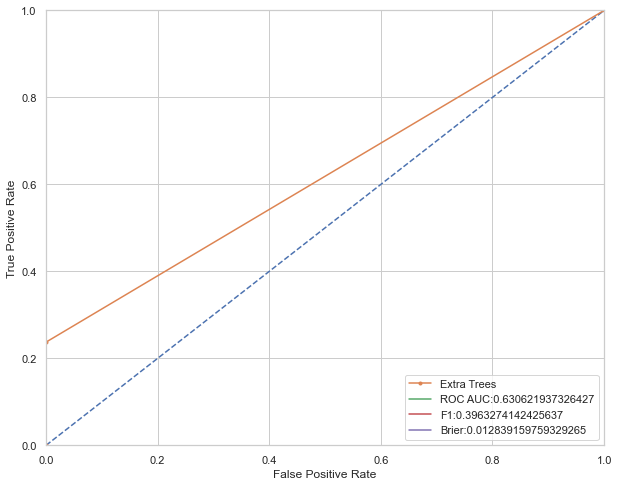

In [190]:
et_class1_probs = et.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, et_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Extra Trees')
plt.plot(0, label = 'ROC AUC:'+str(et_roc_auc))

plt.plot(0, label = 'F1:'+str(et_f1))
plt.plot(0, label = 'Brier:'+str(et_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [191]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    et_thresh_predicts = et_class1_probs > threshold
    precision = precision_score(y_test, et_thresh_predicts)
    recall = recall_score(y_test, et_thresh_predicts)
    f1 = f1_score(y_test, et_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.043, Completeness = 0.992 | F1 = 0.083
Threshold = 0.01 | Accuracy = 0.070, Completeness = 0.958 | F1 = 0.131
Threshold = 0.02 | Accuracy = 0.101, Completeness = 0.915 | F1 = 0.182
Threshold = 0.03 | Accuracy = 0.135, Completeness = 0.915 | F1 = 0.235
Threshold = 0.04 | Accuracy = 0.161, Completeness = 0.898 | F1 = 0.272
Threshold = 0.05 | Accuracy = 0.192, Completeness = 0.881 | F1 = 0.315
Threshold = 0.06 | Accuracy = 0.221, Completeness = 0.856 | F1 = 0.351
Threshold = 0.07 | Accuracy = 0.256, Completeness = 0.847 | F1 = 0.394
Threshold = 0.08 | Accuracy = 0.297, Completeness = 0.839 | F1 = 0.439
Threshold = 0.09 | Accuracy = 0.326, Completeness = 0.831 | F1 = 0.468
Threshold = 0.10 | Accuracy = 0.360, Completeness = 0.805 | F1 = 0.497
Threshold = 0.11 | Accuracy = 0.375, Completeness = 0.797 | F1 = 0.509
Threshold = 0.12 | Accuracy = 0.404, Completeness = 0.780 | F1 = 0.532
Threshold = 0.13 | Accuracy = 0.431, Completeness = 0.763 | F1 = 0.550
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    et_thresh_predicts = et_class1_probs > threshold
    f1 = f1_score(y_test, et_thresh_predicts)
    if f1_list.max() == f1:
        et_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", et_best_threshold)

def custom_predict_et(X, threshold):
    
    return (et_class1_probs > threshold).astype(int)
    
    
et_thresh_predicts = custom_predict_et(X = x_test, threshold = et_best_threshold) 

et_thresh_cm= confusion_matrix(y_test, et_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(et_thresh_cm)

Maximum f1 score is: 0.641 and best threshold is: 0.24

Extra Trees Confusion Matrix:

[[5393   22]
 [  52   66]]


In [193]:
print(classification_report(y_test, et_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.75      0.56      0.64       118

    accuracy                           0.99      5533
   macro avg       0.87      0.78      0.82      5533
weighted avg       0.99      0.99      0.99      5533



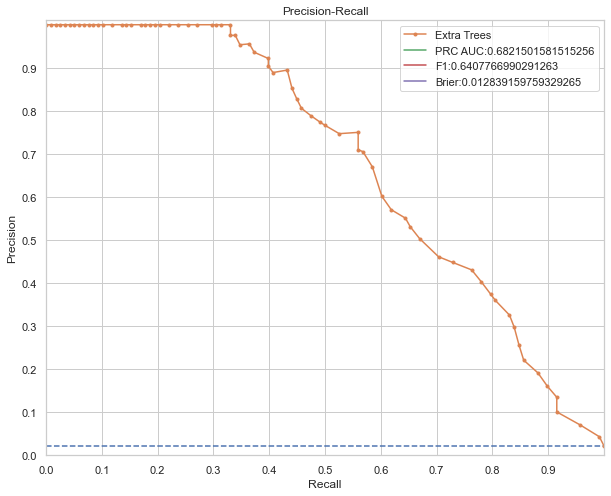

In [194]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, et_class1_probs)
et_thresh_f1, et_prc_auc = f1_score(y_test, et_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Extra Trees')
plt.plot(0,label='PRC AUC:'+str(et_prc_auc))

plt.plot(0,label='F1:'+str(et_thresh_f1))
plt.plot(0,label='Brier:'+str(et_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

#### Hyperparameter Tuning

In [195]:


et_params = {"criterion":["gini", "entropy"],
             "min_samples_split" : [2, 3, 4, 5, 6, 7 ,8 ,9, 10],
             "max_features": [2, 3,4, 5,6,7,8,9 ,10,"auto"],
             "n_estimators": [10,25,50,100,250,500,100],
             "class_weight":['balanced_subsample', 'balanced'],
    
    
             
             }

et_tuned = RandomizedSearchCV(et, 
                           et_params, 
                           cv = cv,
                            n_iter = 50,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 

et_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(et_tuned.best_params_))

et_tuned= ExtraTreesClassifier(criterion=et_tuned.best_params_["criterion"],
                                
                                min_samples_split=et_tuned.best_params_["min_samples_split"],
                              max_features=et_tuned.best_params_["max_features"],
                               n_estimators=et_tuned.best_params_["n_estimators"],
            
                              class_weight=et_tuned.best_params_["class_weight"])
                              

et_tuned.fit(x_train, y_train)

et_tuned_predicts= et_tuned.predict(x_test)

et_tuned_class1_probs =et_tuned.predict_proba(x_test)[:, 1]

et_tuned_cm= confusion_matrix(y_test, et_tuned_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(et_tuned_cm)

print(classification_report(y_test, et_tuned_predicts, target_names=target_names))

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi parametreler: {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 9, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}

Extra Trees Confusion Matrix:

[[5403   12]
 [  67   51]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.81      0.43      0.56       118

    accuracy                           0.99      5533
   macro avg       0.90      0.71      0.78      5533
weighted avg       0.98      0.99      0.98      5533

--- 1601.8946669101715 seconds ---


In [196]:


scores = []
for i in range(1,3):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_f1 = mean(scor)
print("ExtraTree doğrulanmış f1 skoru:", et_tuned_f1)

ExtraTree doğrulanmış f1 skoru: 0.5559004294913339


In [197]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_brier = -1*mean(scor)
print("ExtraTree doğrulanmış brier skoru:", et_tuned_brier)

ExtraTree doğrulanmış brier skoru: 0.013519331079891669


In [198]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_roc_auc = mean(scor)
print("Extra Tree doğrulanmış roc-auc skoru:", et_tuned_roc_auc)

print("--- %s seconds ---" % (time.time() - start_time))

Extra Tree doğrulanmış roc-auc skoru: 0.7176958693420661
--- 1630.4401848316193 seconds ---


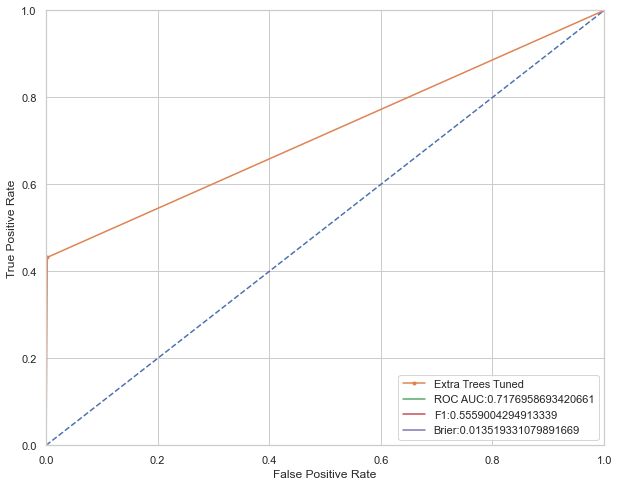

In [199]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, et_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Extra Trees Tuned')
plt.plot(0, label = 'ROC AUC:'+str(et_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(et_tuned_f1))
plt.plot(0, label = 'Brier:'+str(et_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [200]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    et_tuned_thresh_predicts = et_tuned_class1_probs > threshold
    precision = precision_score(y_test, et_tuned_thresh_predicts)
    recall = recall_score(y_test, et_tuned_thresh_predicts)
    f1 = f1_score(y_test, et_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.030, Completeness = 0.992 | F1 = 0.058
Threshold = 0.01 | Accuracy = 0.041, Completeness = 0.992 | F1 = 0.079
Threshold = 0.02 | Accuracy = 0.055, Completeness = 0.975 | F1 = 0.104
Threshold = 0.03 | Accuracy = 0.070, Completeness = 0.966 | F1 = 0.131
Threshold = 0.04 | Accuracy = 0.089, Completeness = 0.966 | F1 = 0.163
Threshold = 0.05 | Accuracy = 0.106, Completeness = 0.958 | F1 = 0.191
Threshold = 0.06 | Accuracy = 0.122, Completeness = 0.949 | F1 = 0.216
Threshold = 0.07 | Accuracy = 0.137, Completeness = 0.941 | F1 = 0.239
Threshold = 0.08 | Accuracy = 0.152, Completeness = 0.924 | F1 = 0.261
Threshold = 0.09 | Accuracy = 0.168, Completeness = 0.915 | F1 = 0.285
Threshold = 0.10 | Accuracy = 0.188, Completeness = 0.915 | F1 = 0.313
Threshold = 0.11 | Accuracy = 0.205, Completeness = 0.907 | F1 = 0.335
Threshold = 0.12 | Accuracy = 0.224, Completeness = 0.907 | F1 = 0.360
Threshold = 0.13 | Accuracy = 0.239, Completeness = 0.898 | F1 = 0.378
Thresh

In [201]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    et_tuned_thresh_predicts = et_tuned_class1_probs > threshold
    f1 = f1_score(y_test, et_tuned_thresh_predicts)
    if f1_list.max() == f1:
        et_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", et_tuned_best_threshold)

def custom_predict_et_tuned(X, threshold):
    
    return (et_tuned_class1_probs > threshold).astype(int)
    
    
et_tuned_thresh_predicts = custom_predict_et_tuned(X = x_test, threshold = et_tuned_best_threshold) 

et_tuned_thresh_cm= confusion_matrix(y_test, et_tuned_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(et_tuned_thresh_cm)

print(classification_report(y_test, et_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.640 and best threshold is: 0.34

Extra Trees Confusion Matrix:

[[5365   50]
 [  39   79]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.61      0.67      0.64       118

    accuracy                           0.98      5533
   macro avg       0.80      0.83      0.82      5533
weighted avg       0.98      0.98      0.98      5533



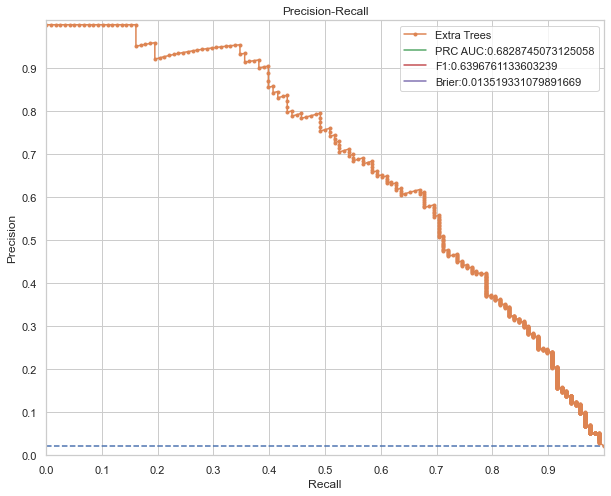

In [202]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, et_tuned_class1_probs)
et_tuned_thresh_f1, et_tuned_prc_auc = f1_score(y_test, et_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Extra Trees')
plt.plot(0,label='PRC AUC:'+str(et_tuned_prc_auc))

plt.plot(0,label='F1:'+str(et_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(et_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [203]:
et_tuned_df_test_class1_probs = et_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
et_df_test_class1_probs = et.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

et_df_test_f1 = f1_score(df_forwards_model_test.Target, et.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(et_df_test_f1)

def custom_predict_et_df_test(X, threshold):
    
    return (et_df_test_class1_probs > threshold).astype(int)
    
et_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_et_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = et_best_threshold))

print(et_df_test_thresh_f1)

et_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, et_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(et_tuned_df_test_f1)

def custom_predict_et_tuned_df_test(X, threshold):
    
    return (et_tuned_df_test_class1_probs > threshold).astype(int)
    
et_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_et_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = et_tuned_best_threshold))

print(et_tuned_thresh_df_test_f1)

0.4
0.573913043478261
0.5189189189189188
0.5714285714285714


### Naive Bayes

In [204]:
nb= GaussianNB()
nb.fit(x_train, y_train)

nb_predicts= nb.predict(x_test)
nb_cm= confusion_matrix(y_test, nb_predicts)
print("\nNaive Bayes  Confusion Matrix:\n")
print(nb_cm)

print(classification_report(y_test, nb_predicts, target_names=target_names))


Naive Bayes  Confusion Matrix:

[[4956  459]
 [  11  107]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.95      5415
           1       0.19      0.91      0.31       118

    accuracy                           0.92      5533
   macro avg       0.59      0.91      0.63      5533
weighted avg       0.98      0.92      0.94      5533



In [205]:
nb_f1 = cross_val_score(nb, x, y, cv=cv, scoring='f1').mean()
print("Naive Bayes doğrulanmış f1 skoru:", nb_f1)

Naive Bayes doğrulanmış f1 skoru: 0.2934124015090605


In [206]:
nb_brier = -1*cross_val_score(nb, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Naive Bayes doğrulanmış brier skoru:", nb_brier)

Naive Bayes doğrulanmış brier skoru: 0.07566800535888933


In [207]:
nb_roc_auc = cross_val_score(nb, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Naive Bayes doğrulanmış roc-auc skoru:", nb_roc_auc)

Naive Bayes doğrulanmış roc-auc skoru: 0.8698121143873276


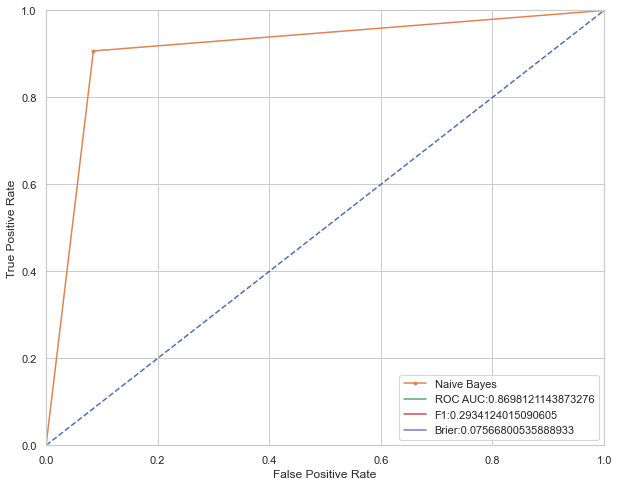

In [208]:
nb_class1_probs = nb.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, nb_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
plt.plot(0, label = 'ROC AUC:'+str(nb_roc_auc))

plt.plot(0, label = 'F1:'+str(nb_f1))
plt.plot(0, label = 'Brier:'+str(nb_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [209]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    nb_thresh_predicts = nb_class1_probs > threshold
    precision = precision_score(y_test, nb_thresh_predicts)
    recall = recall_score(y_test, nb_thresh_predicts)
    f1 = f1_score(y_test, nb_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.109, Completeness = 0.932 | F1 = 0.195
Threshold = 0.02 | Accuracy = 0.117, Completeness = 0.932 | F1 = 0.207
Threshold = 0.03 | Accuracy = 0.123, Completeness = 0.932 | F1 = 0.218
Threshold = 0.04 | Accuracy = 0.129, Completeness = 0.932 | F1 = 0.226
Threshold = 0.05 | Accuracy = 0.133, Completeness = 0.932 | F1 = 0.233
Threshold = 0.06 | Accuracy = 0.136, Completeness = 0.932 | F1 = 0.238
Threshold = 0.07 | Accuracy = 0.139, Completeness = 0.932 | F1 = 0.241
Threshold = 0.08 | Accuracy = 0.140, Completeness = 0.932 | F1 = 0.244
Threshold = 0.09 | Accuracy = 0.141, Completeness = 0.932 | F1 = 0.244
Threshold = 0.10 | Accuracy = 0.143, Completeness = 0.932 | F1 = 0.247
Threshold = 0.11 | Accuracy = 0.144, Completeness = 0.932 | F1 = 0.250
Threshold = 0.12 | Accuracy = 0.145, Completeness = 0.932 | F1 = 0.251
Threshold = 0.13 | Accuracy = 0.147, Completeness = 0.932 | F1 = 0.254
Thresh

In [210]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    nb_thresh_predicts = nb_class1_probs > threshold
    f1 = f1_score(y_test, nb_thresh_predicts)
    if f1_list.max() == f1:
        nb_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", nb_best_threshold)

def custom_predict_nb(X, threshold):
    
    return (nb_class1_probs > threshold).astype(int)
    
    
nb_thresh_predicts = custom_predict_nb(X = x_test, threshold = nb_best_threshold) 

nb_thresh_cm= confusion_matrix(y_test, nb_thresh_predicts)
print("\nNaive Bayes Confusion Matrix:\n")
print(nb_thresh_cm)

print(classification_report(y_test, nb_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.386 and best threshold is: 0.9400000000000001

Naive Bayes Confusion Matrix:

[[5119  296]
 [  19   99]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5415
           1       0.25      0.84      0.39       118

    accuracy                           0.94      5533
   macro avg       0.62      0.89      0.68      5533
weighted avg       0.98      0.94      0.96      5533



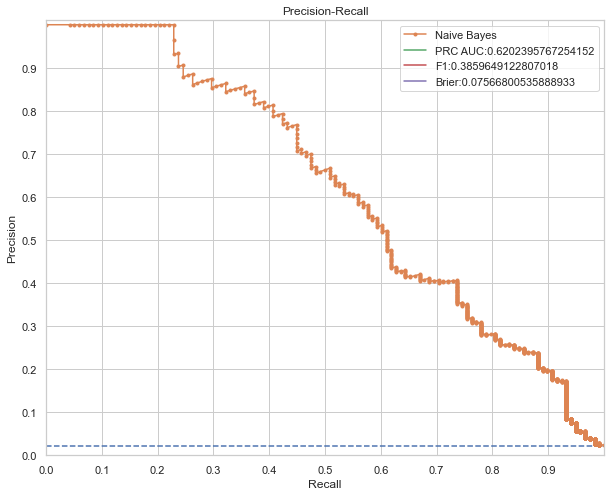

In [211]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, nb_class1_probs)
nb_thresh_f1, nb_prc_auc = f1_score(y_test, nb_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.plot(0,label='PRC AUC:'+str(nb_prc_auc))

plt.plot(0,label='F1:'+str(nb_thresh_f1))
plt.plot(0,label='Brier:'+str(nb_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

#### Hyperparameter Tuning

In [212]:
nb_params = {"var_smoothing":[0.0000000001, 0.000000001, 0.00000001, 0.0000001,  0.000001, 0.00001, 0.0001,0.001, 0.01]
    
    
             
             }

nb_tuned = GridSearchCV(nb, 
                           nb_params, 
                           cv = cv,
                            
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 

nb_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(nb_tuned.best_params_))

nb_tuned= GaussianNB(var_smoothing=nb_tuned.best_params_["var_smoothing"])
                              

nb_tuned.fit(x_train, y_train)

nb_tuned_predicts= nb_tuned.predict(x_test)

nb_tuned_class1_probs =nb_tuned.predict_proba(x_test)[:, 1]

nb_tuned_cm= confusion_matrix(y_test, nb_tuned_predicts)
print("\nNaive Bayes Confusion Matrix:\n")
print(nb_tuned_cm)

print(classification_report(y_test, nb_tuned_predicts, target_names=target_names))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
En iyi parametreler: {'var_smoothing': 0.01}

Naive Bayes Confusion Matrix:

[[4982  433]
 [  11  107]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5415
           1       0.20      0.91      0.33       118

    accuracy                           0.92      5533
   macro avg       0.60      0.91      0.64      5533
weighted avg       0.98      0.92      0.94      5533



In [213]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_f1 = mean(scor)
print("Naive Bayes doğrulanmış f1 skoru:", nb_tuned_f1)

Naive Bayes doğrulanmış f1 skoru: 0.2993793115757593


In [214]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_brier = -1*mean(scor)
print("Naive Bayes doğrulanmış brier skoru:", nb_tuned_brier)

Naive Bayes doğrulanmış brier skoru: 0.07161154783300612


In [215]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_roc_auc = mean(scor)
print("Naive Bayes doğrulanmış roc-auc skoru:", nb_tuned_roc_auc)

Naive Bayes doğrulanmış roc-auc skoru: 0.8686194608652423


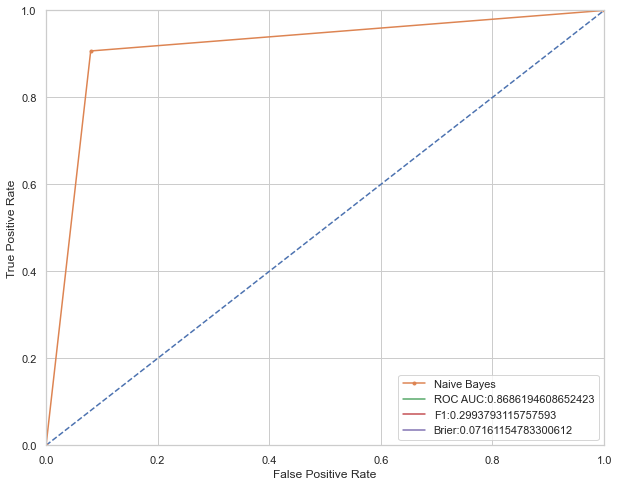

In [216]:
nb_tuned_class1_probs = nb_tuned.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, nb_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
plt.plot(0, label = 'ROC AUC:'+str(nb_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(nb_tuned_f1))
plt.plot(0, label = 'Brier:'+str(nb_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [217]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    nb_tuned_thresh_predicts = nb_tuned_class1_probs > threshold
    precision = precision_score(y_test, nb_tuned_thresh_predicts)
    recall = recall_score(y_test, nb_tuned_thresh_predicts)
    f1 = f1_score(y_test, nb_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.107, Completeness = 0.932 | F1 = 0.192
Threshold = 0.02 | Accuracy = 0.118, Completeness = 0.932 | F1 = 0.210
Threshold = 0.03 | Accuracy = 0.123, Completeness = 0.932 | F1 = 0.217
Threshold = 0.04 | Accuracy = 0.129, Completeness = 0.932 | F1 = 0.227
Threshold = 0.05 | Accuracy = 0.133, Completeness = 0.932 | F1 = 0.232
Threshold = 0.06 | Accuracy = 0.136, Completeness = 0.932 | F1 = 0.237
Threshold = 0.07 | Accuracy = 0.139, Completeness = 0.932 | F1 = 0.242
Threshold = 0.08 | Accuracy = 0.140, Completeness = 0.932 | F1 = 0.244
Threshold = 0.09 | Accuracy = 0.142, Completeness = 0.932 | F1 = 0.246
Threshold = 0.10 | Accuracy = 0.143, Completeness = 0.932 | F1 = 0.248
Threshold = 0.11 | Accuracy = 0.145, Completeness = 0.932 | F1 = 0.250
Threshold = 0.12 | Accuracy = 0.146, Completeness = 0.924 | F1 = 0.251
Threshold = 0.13 | Accuracy = 0.149, Completeness = 0.924 | F1 = 0.256
Thresh

In [218]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    nb_tuned_thresh_predicts = nb_tuned_class1_probs > threshold
    f1 = f1_score(y_test, nb_tuned_thresh_predicts)
    if f1_list.max() == f1:
        nb_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", nb_tuned_best_threshold)

def custom_predict_nb_tuned(X, threshold):
    
    return (nb_tuned_class1_probs > threshold).astype(int)
    
    
nb_tuned_thresh_predicts = custom_predict_nb_tuned(X = x_test, threshold = nb_tuned_best_threshold) 

nb_tuned_thresh_cm= confusion_matrix(y_test, nb_tuned_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(nb_tuned_thresh_cm)

print(classification_report(y_test, nb_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.394 and best threshold is: 0.9400000000000001

Extra Trees Confusion Matrix:

[[5146  269]
 [  23   95]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5415
           1       0.26      0.81      0.39       118

    accuracy                           0.95      5533
   macro avg       0.63      0.88      0.68      5533
weighted avg       0.98      0.95      0.96      5533



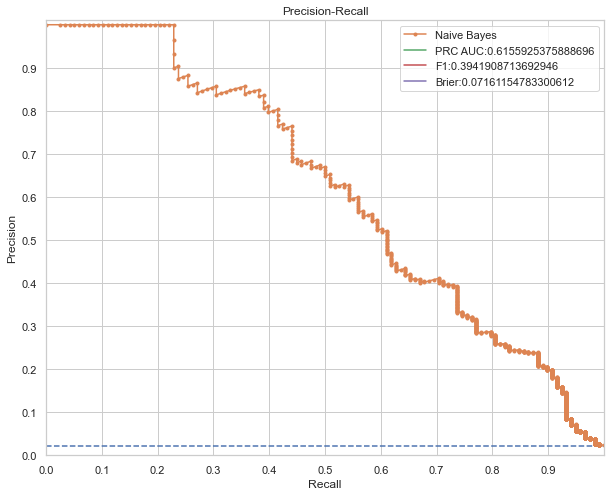

In [219]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, nb_tuned_class1_probs)
nb_tuned_thresh_f1, nb_tuned_prc_auc = f1_score(y_test, nb_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.plot(0,label='PRC AUC:'+str(nb_tuned_prc_auc))

plt.plot(0,label='F1:'+str(nb_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(nb_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [220]:
nb_tuned_df_test_class1_probs = nb_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
nb_df_test_class1_probs = nb.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

nb_df_test_f1 = f1_score(df_forwards_model_test.Target, nb.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(nb_df_test_f1)

def custom_predict_nb_df_test(X, threshold):
    
    return (nb_df_test_class1_probs > threshold).astype(int)
    
nb_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_nb_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = nb_best_threshold))

print(nb_df_test_thresh_f1)

nb_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, nb_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(nb_tuned_df_test_f1)

def custom_predict_nb_tuned_df_test(X, threshold):
    
    return (nb_tuned_df_test_class1_probs > threshold).astype(int)
    
nb_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_nb_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = nb_tuned_best_threshold))

print(nb_tuned_thresh_df_test_f1)

0.32899022801302935
0.3760330578512397
0.3283082077051926
0.39824945295404807


### XG Boost

In [221]:
xg= XGBClassifier()
xg.fit(x_train, y_train)

xg_predicts= xg.predict(x_test)
xg_cm= confusion_matrix(y_test, xg_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(xg_cm)

print(classification_report(y_test, xg_predicts, target_names=target_names))


XG Boost Confusion Matrix:

[[5404   11]
 [  62   56]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.84      0.47      0.61       118

    accuracy                           0.99      5533
   macro avg       0.91      0.74      0.80      5533
weighted avg       0.99      0.99      0.99      5533



In [222]:
xg_f1 = cross_val_score(xg, x, y, cv=cv, scoring='f1').mean()
print("XG Boost doğrulanmış f1 skoru:", xg_f1)

#---------------------------------


xg_brier = -1*cross_val_score(xg, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nXG Boost doğrulanmış brier skoru:", xg_brier)

#---------------------------------



xg_roc_auc = cross_val_score(xg, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nXG Boost doğrulanmış roc-auc skoru:", xg_roc_auc)

XG Boost doğrulanmış f1 skoru: 0.5984426899481734

XG Boost doğrulanmış brier skoru: 0.011870047746362203

XG Boost doğrulanmış roc-auc skoru: 0.7391647828333276


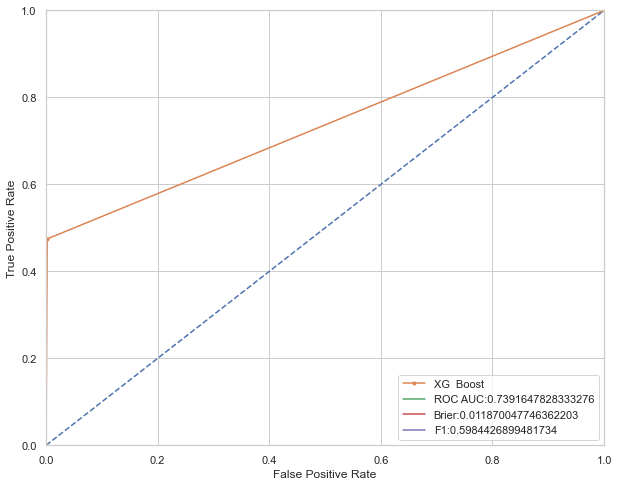

In [223]:
xg_class1_probs = xg.predict_proba(x_test)[:,1]
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, xg_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='XG  Boost')
plt.plot(0, label = 'ROC AUC:'+str(xg_roc_auc))

plt.plot(0, label = 'Brier:'+str(xg_brier))
plt.plot(0, label = 'F1:'+str(xg_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [224]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    xg_thresh_predicts = xg_class1_probs > threshold
    precision = precision_score(y_test, xg_thresh_predicts)
    recall = recall_score(y_test, xg_thresh_predicts)
    f1 = f1_score(y_test, xg_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.353, Completeness = 0.814 | F1 = 0.492
Threshold = 0.02 | Accuracy = 0.443, Completeness = 0.763 | F1 = 0.561
Threshold = 0.03 | Accuracy = 0.473, Completeness = 0.737 | F1 = 0.576
Threshold = 0.04 | Accuracy = 0.503, Completeness = 0.729 | F1 = 0.595
Threshold = 0.05 | Accuracy = 0.535, Completeness = 0.703 | F1 = 0.608
Threshold = 0.06 | Accuracy = 0.555, Completeness = 0.686 | F1 = 0.614
Threshold = 0.07 | Accuracy = 0.568, Completeness = 0.669 | F1 = 0.615
Threshold = 0.08 | Accuracy = 0.603, Completeness = 0.669 | F1 = 0.635
Threshold = 0.09 | Accuracy = 0.617, Completeness = 0.669 | F1 = 0.642
Threshold = 0.10 | Accuracy = 0.627, Completeness = 0.669 | F1 = 0.648
Threshold = 0.11 | Accuracy = 0.639, Completeness = 0.661 | F1 = 0.650
Threshold = 0.12 | Accuracy = 0.661, Completeness = 0.661 | F1 = 0.661
Threshold = 0.13 | Accuracy = 0.672, Completeness = 0.661 | F1 = 0.667
Thresh

In [225]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    xg_thresh_predicts = xg_class1_probs > threshold
    f1 = f1_score(y_test, xg_thresh_predicts)
    if f1_list.max() == f1:
        xg_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", xg_best_threshold)

def custom_predict_xg(X, threshold):
    
    return (xg_class1_probs > threshold).astype(int)
    
    
xg_thresh_predicts = custom_predict_xg(X = x_test, threshold = xg_best_threshold) 

xg_thresh_cm= confusion_matrix(y_test, xg_thresh_predicts)
print("\XG Boost Confusion Matrix:\n")
print(xg_thresh_cm)

print(classification_report(y_test, xg_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.673 and best threshold is: 0.17
\XG Boost Confusion Matrix:

[[5385   30]
 [  43   75]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.71      0.64      0.67       118

    accuracy                           0.99      5533
   macro avg       0.85      0.82      0.83      5533
weighted avg       0.99      0.99      0.99      5533



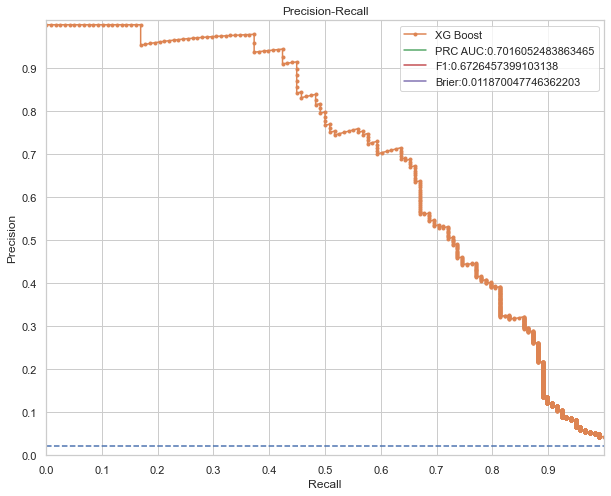

In [226]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, xg_class1_probs)
xg_thresh_f1, xg_prc_auc = f1_score(y_test, xg_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='XG Boost')
plt.plot(0,label='PRC AUC:'+str(xg_prc_auc))

plt.plot(0,label='F1:'+str(xg_thresh_f1))
plt.plot(0,label='Brier:'+str(xg_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

#### Hyperparameter Tuning

In [227]:
xgboost.set_config(verbosity=0)

xg_params = {
        'n_estimators': [10, 100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6, 10],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10],
        "max_leaves":[0,1,2,3,5,10]}
    
    
             
            

xg_tuned = RandomizedSearchCV(xg, 
                           xg_params, 
                           cv = cv,
                           n_iter=50,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 


xg_tuned.fit(x_train, y_train)
print("En iyi parametreler: " + str(xg_tuned.best_params_))

xg_tuned= XGBClassifier(n_estimators=xg_tuned.best_params_["n_estimators"],
                     subsample=xg_tuned.best_params_["subsample"],
                     
                     max_depth=xg_tuned.best_params_["max_depth"],
               learning_rate=xg_tuned.best_params_["learning_rate"],
               min_samples_split=xg_tuned.best_params_["min_samples_split"],
               max_leaves=xg_tuned.best_params_["max_leaves"],
                        eval_metric='mlogloss'
              
                     )
                              

xg_tuned.fit(x_train, y_train)

xg_tuned_predicts= xg_tuned.predict(x_test)

xg_tuned_class1_probs =xg_tuned.predict_proba(x_test)[:, 1]

xg_tuned_cm= confusion_matrix(y_test, xg_tuned_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(xg_tuned_cm)

print(classification_report(y_test, xg_tuned_predicts, target_names=target_names))


print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi parametreler: {'subsample': 0.8, 'n_estimators': 1000, 'min_samples_split': 5, 'max_leaves': 2, 'max_depth': 4, 'learning_rate': 0.02}

XG Boost Confusion Matrix:

[[5406    9]
 [  62   56]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.86      0.47      0.61       118

    accuracy                           0.99      5533
   macro avg       0.93      0.74      0.80      5533
weighted avg       0.99      0.99      0.99      5533

--- 1831.72407913208 seconds ---


In [228]:


xg_tuned_f1 = cross_val_score(xg_tuned, x, y, cv=cv, scoring='f1').mean()
print("XG Boost doğrulanmış f1 skoru:", xg_tuned_f1)

#---------------------------------



xg_tuned_brier = -1*cross_val_score(xg_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nXG Boost doğrulanmış brier skoru:", xg_tuned_brier)

#---------------------------------


xg_tuned_roc_auc = cross_val_score(xg_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nXG Boost doğrulanmış roc-auc skoru:", xg_tuned_roc_auc)
print("--- %s seconds ---" % (time.time() - start_time))

XG Boost doğrulanmış f1 skoru: 0.5907097827329599

XG Boost doğrulanmış brier skoru: 0.011201680579634537

XG Boost doğrulanmış roc-auc skoru: 0.7350666743063785
--- 1887.3918912410736 seconds ---


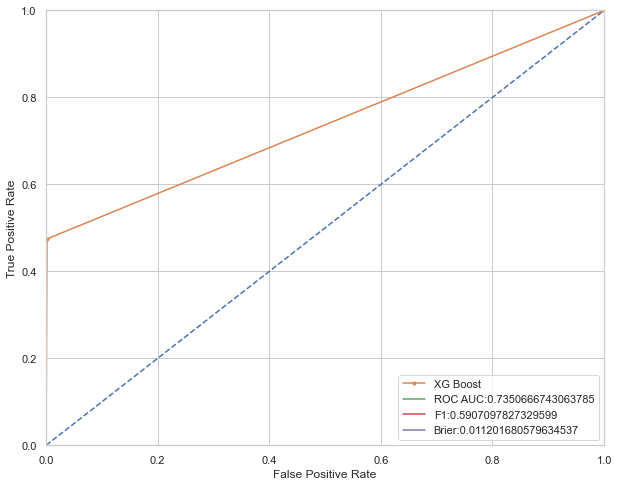

In [229]:
xg_tuned_class1_probs = xg_tuned.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, xg_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='XG Boost')
plt.plot(0, label = 'ROC AUC:'+str(xg_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(xg_tuned_f1))
plt.plot(0, label = 'Brier:'+str(xg_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [230]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    xg_tuned_thresh_predicts = xg_tuned_class1_probs > threshold
    precision = precision_score(y_test, xg_tuned_thresh_predicts)
    recall = recall_score(y_test, xg_tuned_thresh_predicts)
    f1 = f1_score(y_test, xg_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.198, Completeness = 0.890 | F1 = 0.324
Threshold = 0.02 | Accuracy = 0.290, Completeness = 0.847 | F1 = 0.432
Threshold = 0.03 | Accuracy = 0.363, Completeness = 0.831 | F1 = 0.505
Threshold = 0.04 | Accuracy = 0.418, Completeness = 0.822 | F1 = 0.554
Threshold = 0.05 | Accuracy = 0.457, Completeness = 0.814 | F1 = 0.585
Threshold = 0.06 | Accuracy = 0.487, Completeness = 0.805 | F1 = 0.607
Threshold = 0.07 | Accuracy = 0.508, Completeness = 0.788 | F1 = 0.618
Threshold = 0.08 | Accuracy = 0.523, Completeness = 0.771 | F1 = 0.623
Threshold = 0.09 | Accuracy = 0.550, Completeness = 0.746 | F1 = 0.633
Threshold = 0.10 | Accuracy = 0.561, Completeness = 0.737 | F1 = 0.637
Threshold = 0.11 | Accuracy = 0.572, Completeness = 0.737 | F1 = 0.644
Threshold = 0.12 | Accuracy = 0.594, Completeness = 0.720 | F1 = 0.651
Threshold = 0.13 | Accuracy = 0.606, Completeness = 0.703 | F1 = 0.651
Thresh

In [231]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    xg_tuned_thresh_predicts = xg_tuned_class1_probs > threshold
    f1 = f1_score(y_test, xg_tuned_thresh_predicts)
    if f1_list.max() == f1:
        xg_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", xg_tuned_best_threshold)

def custom_predict_xg_tuned(X, threshold):
    
    return (xg_tuned_class1_probs > threshold).astype(int)
    
    
xg_tuned_thresh_predicts = custom_predict_xg_tuned(X = x_test, threshold = xg_tuned_best_threshold) 

xg_tuned_thresh_cm= confusion_matrix(y_test, xg_tuned_thresh_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(xg_tuned_thresh_cm)

print(classification_report(y_test, xg_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.705 and best threshold is: 0.23

XG Boost Confusion Matrix:

[[5388   27]
 [  39   79]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.75      0.67      0.71       118

    accuracy                           0.99      5533
   macro avg       0.87      0.83      0.85      5533
weighted avg       0.99      0.99      0.99      5533



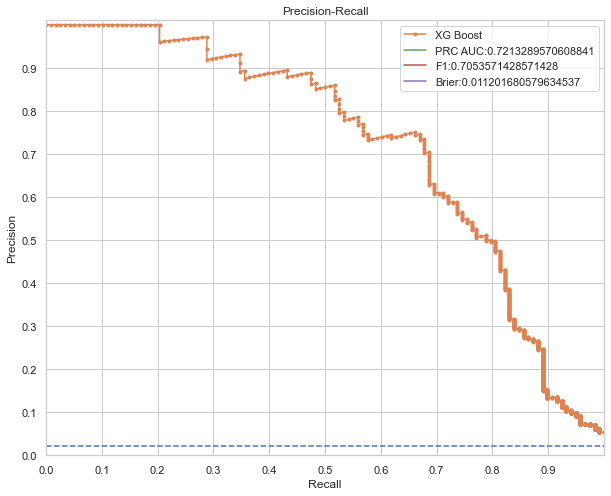

In [232]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, xg_tuned_class1_probs)
xg_tuned_thresh_f1, xg_tuned_prc_auc = f1_score(y_test, xg_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='XG Boost')
plt.plot(0,label='PRC AUC:'+str(xg_tuned_prc_auc))

plt.plot(0,label='F1:'+str(xg_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(xg_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [233]:
xg_tuned_df_test_class1_probs = xg_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
xg_df_test_class1_probs = xg.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

xg_df_test_f1 = f1_score(df_forwards_model_test.Target, xg.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(xg_df_test_f1)

def custom_predict_xg_df_test(X, threshold):
    
    return (xg_df_test_class1_probs > threshold).astype(int)
    
xg_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_xg_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = xg_best_threshold))

print(xg_df_test_thresh_f1)

xg_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, xg_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(xg_tuned_df_test_f1)

def custom_predict_xg_tuned_df_test(X, threshold):
    
    return (xg_tuned_df_test_class1_probs > threshold).astype(int)
    
xg_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_xg_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = xg_tuned_best_threshold))

print(xg_tuned_thresh_df_test_f1)

0.5502645502645502
0.5789473684210527
0.5698924731182796
0.6431718061674009


### Cat Boost

In [234]:
cb= CatBoostClassifier(verbose=False)
cb.fit(x_train, y_train)

cb_predicts= cb.predict(x_test)
cb_cm= confusion_matrix(y_test, cb_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(cb_cm)

print(classification_report(y_test, cb_predicts, target_names=target_names))

C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,



XG Boost Confusion Matrix:

[[5408    7]
 [  67   51]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.88      0.43      0.58       118

    accuracy                           0.99      5533
   macro avg       0.93      0.72      0.79      5533
weighted avg       0.99      0.99      0.98      5533



In [235]:


cb_f1 = cross_val_score(cb, x, y, cv=cv, scoring='f1').mean()
print("Cat Boost doğrulanmış f1 skoru:", cb_f1)

#---------------------------------


cb_brier = -1*cross_val_score(cb, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nCat Boost doğrulanmış brier skoru:", cb_brier)

#---------------------------------



cb_roc_auc = cross_val_score(xg_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nCat Boost doğrulanmış roc-auc skoru:", cb_roc_auc)

print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future v

Cat Boost doğrulanmış f1 skoru: 0.5811008572605832


C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future v


Cat Boost doğrulanmış brier skoru: 0.011322628155854584

Cat Boost doğrulanmış roc-auc skoru: 0.7350666743063785
--- 1967.0650751590729 seconds ---


C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


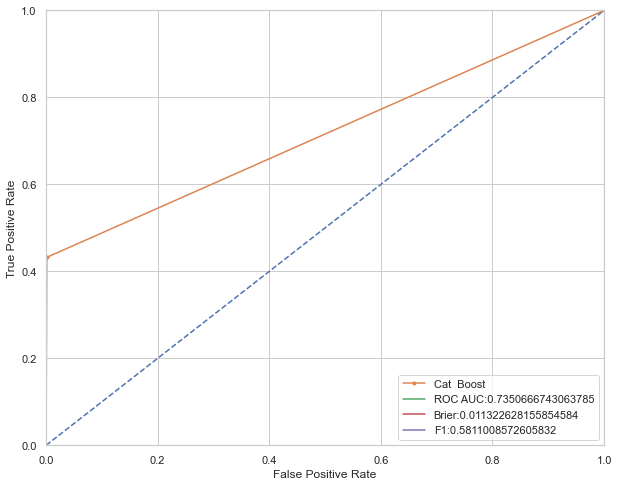

In [236]:
cb_class1_probs = cb.predict_proba(x_test)[:,1]
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, cb_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Cat  Boost')
plt.plot(0, label = 'ROC AUC:'+str(cb_roc_auc))

plt.plot(0, label = 'Brier:'+str(cb_brier))
plt.plot(0, label = 'F1:'+str(cb_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [237]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    cb_thresh_predicts = cb_class1_probs > threshold
    precision = precision_score(y_test, cb_thresh_predicts)
    recall = recall_score(y_test, cb_thresh_predicts)
    f1 = f1_score(y_test, cb_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.155, Completeness = 0.941 | F1 = 0.266
Threshold = 0.02 | Accuracy = 0.243, Completeness = 0.890 | F1 = 0.382
Threshold = 0.03 | Accuracy = 0.321, Completeness = 0.856 | F1 = 0.467
Threshold = 0.04 | Accuracy = 0.375, Completeness = 0.856 | F1 = 0.522
Threshold = 0.05 | Accuracy = 0.413, Completeness = 0.822 | F1 = 0.550
Threshold = 0.06 | Accuracy = 0.453, Completeness = 0.822 | F1 = 0.584
Threshold = 0.07 | Accuracy = 0.497, Completeness = 0.805 | F1 = 0.615
Threshold = 0.08 | Accuracy = 0.540, Completeness = 0.805 | F1 = 0.646
Threshold = 0.09 | Accuracy = 0.554, Completeness = 0.780 | F1 = 0.648
Threshold = 0.10 | Accuracy = 0.582, Completeness = 0.780 | F1 = 0.667
Threshold = 0.11 | Accuracy = 0.600, Completeness = 0.763 | F1 = 0.672
Threshold = 0.12 | Accuracy = 0.611, Completeness = 0.746 | F1 = 0.672
Threshold = 0.13 | Accuracy = 0.614, Completeness = 0.729 | F1 = 0.667
Thresh

In [238]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    cb_thresh_predicts = cb_class1_probs > threshold
    f1 = f1_score(y_test, cb_thresh_predicts)
    if f1_list.max() == f1:
        cb_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", cb_best_threshold)

def custom_predict_cb(X, threshold):
    
    return (cb_class1_probs > threshold).astype(int)
    
    
cb_thresh_predicts = custom_predict_cb(X = x_test, threshold = cb_best_threshold) 

cb_thresh_cm= confusion_matrix(y_test, cb_thresh_predicts)
print("\Cat Boost Confusion Matrix:\n")
print(cb_thresh_cm)

print(classification_report(y_test, cb_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.680 and best threshold is: 0.18
\Cat Boost Confusion Matrix:

[[5372   43]
 [  35   83]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.66      0.70      0.68       118

    accuracy                           0.99      5533
   macro avg       0.83      0.85      0.84      5533
weighted avg       0.99      0.99      0.99      5533



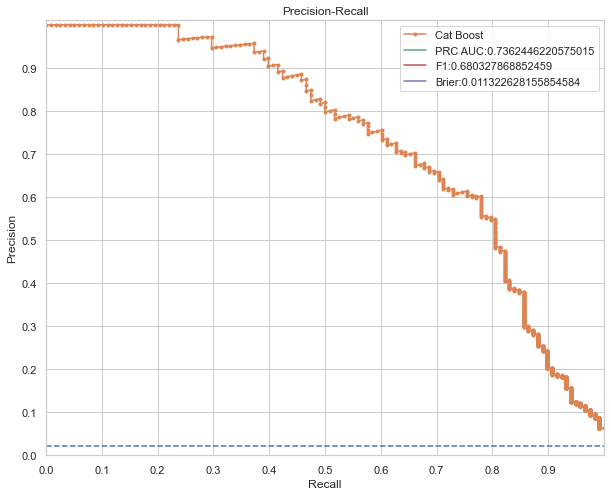

In [239]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, cb_class1_probs)
cb_thresh_f1, cb_prc_auc = f1_score(y_test, cb_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Cat Boost')
plt.plot(0,label='PRC AUC:'+str(cb_prc_auc))

plt.plot(0,label='F1:'+str(cb_thresh_f1))
plt.plot(0,label='Brier:'+str(cb_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

#### Hyperparameter Tuning

In [240]:


cb_params = {
    
    'learning_rate': [0.01,0.05, 0.1],
    
"max_ctr_complexity":[1,2,3,4,5],
'n_estimators': [10, 100, 500, 1000, 2000],
"score_function" : ["L2", "Cosine"],
'subsample': [0.6, 0.8, 1.0],
'max_depth': [3, 4, 5,6, 10],
"min_child_samples":[2,3,4,5,10]}

    
    
             
            

cb_tuned = RandomizedSearchCV(cb, 
                           cb_params, 
                           cv = cv,
                           n_iter=50,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 


cb_tuned.fit(x_train, y_train)
print("En iyi parametreler: " + str(cb_tuned.best_params_))

cb_tuned= CatBoostClassifier(
                     learning_rate=cb_tuned.best_params_["learning_rate"],
                     
                     max_depth=cb_tuned.best_params_["max_depth"],
               max_ctr_complexity=cb_tuned.best_params_["max_ctr_complexity"],
               score_function=cb_tuned.best_params_["score_function"],
               
                             subsample=cb_tuned.best_params_["subsample"],
                             min_child_samples=cb_tuned.best_params_["min_child_samples"],
    n_estimators=cb_tuned.best_params_["n_estimators"],
                             verbose=False
                        
              
                     )
                              

cb_tuned.fit(x_train, y_train)

cb_tuned_predicts= cb_tuned.predict(x_test)

cb_tuned_class1_probs =cb_tuned.predict_proba(x_test)[:, 1]

cb_tuned_cm= confusion_matrix(y_test, cb_tuned_predicts)
print("\nCat Boost Confusion Matrix:\n")
print(cb_tuned_cm)

print(classification_report(y_test, cb_tuned_predicts, target_names=target_names))

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


En iyi parametreler: {'subsample': 0.8, 'score_function': 'L2', 'n_estimators': 2000, 'min_child_samples': 5, 'max_depth': 4, 'max_ctr_complexity': 4, 'learning_rate': 0.1}

Cat Boost Confusion Matrix:

[[5405   10]
 [  63   55]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.85      0.47      0.60       118

    accuracy                           0.99      5533
   macro avg       0.92      0.73      0.80      5533
weighted avg       0.99      0.99      0.98      5533

--- 2215.8221168518066 seconds ---


In [241]:


cb_tuned_f1 = cross_val_score(cb_tuned, x, y, cv=cv, scoring='f1').mean()
print("Cat Boost doğrulanmış f1 skoru:", cb_tuned_f1)

#---------------------------------



cb_tuned_brier = -1*cross_val_score(cb_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nCat Boost doğrulanmış brier skoru:", cb_tuned_brier)

#---------------------------------


cb_tuned_roc_auc = cross_val_score(cb_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nCat Boost doğrulanmış roc-auc skoru:", cb_tuned_roc_auc)


print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future v

Cat Boost doğrulanmış f1 skoru: 0.5871756311446662


C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future v


Cat Boost doğrulanmış brier skoru: 0.012308523017630232


C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future v


Cat Boost doğrulanmış roc-auc skoru: 0.7350017635435192
--- 2358.7909593582153 seconds ---


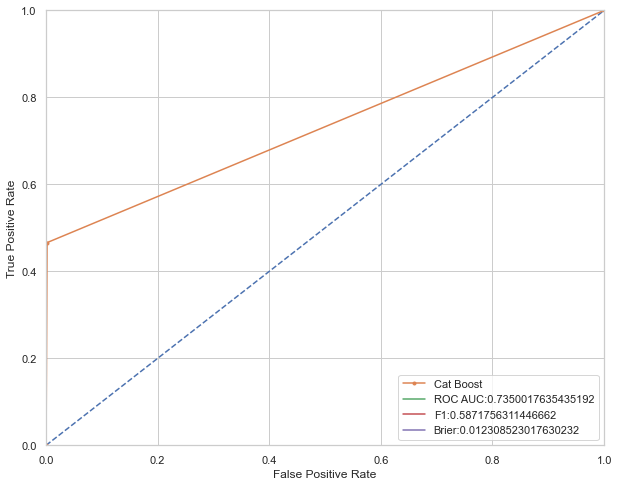

In [242]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, cb_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Cat Boost')
plt.plot(0, label = 'ROC AUC:'+str(cb_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(cb_tuned_f1))
plt.plot(0, label = 'Brier:'+str(cb_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [243]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    cb_tuned_thresh_predicts = cb_tuned_class1_probs > threshold
    precision = precision_score(y_test, cb_tuned_thresh_predicts)
    recall = recall_score(y_test, cb_tuned_thresh_predicts)
    f1 = f1_score(y_test, cb_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.409, Completeness = 0.780 | F1 = 0.536
Threshold = 0.02 | Accuracy = 0.492, Completeness = 0.737 | F1 = 0.590
Threshold = 0.03 | Accuracy = 0.564, Completeness = 0.712 | F1 = 0.629
Threshold = 0.04 | Accuracy = 0.590, Completeness = 0.695 | F1 = 0.638
Threshold = 0.05 | Accuracy = 0.604, Completeness = 0.686 | F1 = 0.643
Threshold = 0.06 | Accuracy = 0.615, Completeness = 0.678 | F1 = 0.645
Threshold = 0.07 | Accuracy = 0.655, Completeness = 0.661 | F1 = 0.658
Threshold = 0.08 | Accuracy = 0.675, Completeness = 0.653 | F1 = 0.664
Threshold = 0.09 | Accuracy = 0.694, Completeness = 0.653 | F1 = 0.672
Threshold = 0.10 | Accuracy = 0.704, Completeness = 0.644 | F1 = 0.673
Threshold = 0.11 | Accuracy = 0.728, Completeness = 0.636 | F1 = 0.679
Threshold = 0.12 | Accuracy = 0.745, Completeness = 0.619 | F1 = 0.676
Threshold = 0.13 | Accuracy = 0.750, Completeness = 0.610 | F1 = 0.673
Thresh

In [244]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    cb_tuned_thresh_predicts = cb_tuned_class1_probs > threshold
    f1 = f1_score(y_test, cb_tuned_thresh_predicts)
    if f1_list.max() == f1:
        cb_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", cb_tuned_best_threshold)

def custom_predict_cb_tuned(X, threshold):
    
    return (cb_tuned_class1_probs > threshold).astype(int)
    
    
cb_tuned_thresh_predicts = custom_predict_cb_tuned(X = x_test, threshold = cb_tuned_best_threshold) 

cb_tuned_thresh_cm= confusion_matrix(y_test, cb_tuned_thresh_predicts)
print("\nCat Boost Confusion Matrix:\n")
print(cb_tuned_thresh_cm)

print(classification_report(y_test, cb_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.679 and best threshold is: 0.11

Cat Boost Confusion Matrix:

[[5387   28]
 [  43   75]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.73      0.64      0.68       118

    accuracy                           0.99      5533
   macro avg       0.86      0.82      0.84      5533
weighted avg       0.99      0.99      0.99      5533



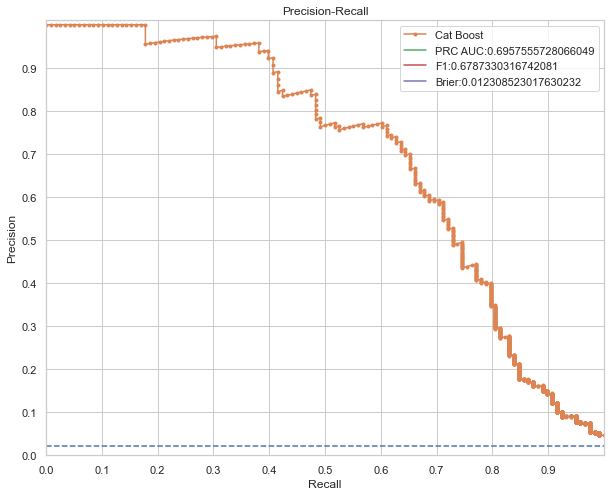

In [245]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, cb_tuned_class1_probs)
cb_tuned_thresh_f1, cb_tuned_prc_auc = f1_score(y_test, cb_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Cat Boost')
plt.plot(0,label='PRC AUC:'+str(cb_tuned_prc_auc))

plt.plot(0,label='F1:'+str(cb_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(cb_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [246]:
cb_tuned_df_test_class1_probs = cb_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
cb_df_test_class1_probs = cb.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

cb_df_test_f1 = f1_score(df_forwards_model_test.Target, cb.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(cb_df_test_f1)

def custom_predict_cb_df_test(X, threshold):
    
    return (cb_df_test_class1_probs > threshold).astype(int)
    
cb_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_cb_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = cb_best_threshold))

print(cb_df_test_thresh_f1)

cb_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, cb_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(cb_tuned_df_test_f1)

def custom_predict_cb_tuned_df_test(X, threshold):
    
    return (cb_tuned_df_test_class1_probs > threshold).astype(int)
    
cb_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_cb_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = cb_tuned_best_threshold))

print(cb_tuned_thresh_df_test_f1)

0.5652173913043479
0.6527196652719666
0.5789473684210525
0.6406926406926408


C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future v

### Light GBM

In [247]:
lg= LGBMClassifier()
lg.fit(x_train, y_train)

lg_predicts= lg.predict(x_test)
lg_cm= confusion_matrix(y_test, lg_predicts)
print("\nLight GBM Confusion Matrix:\n")
print(lg_cm)

print(classification_report(y_test, lg_predicts, target_names=target_names))


Light GBM Confusion Matrix:

[[5402   13]
 [  63   55]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.81      0.47      0.59       118

    accuracy                           0.99      5533
   macro avg       0.90      0.73      0.79      5533
weighted avg       0.98      0.99      0.98      5533



In [248]:


lg_f1 = cross_val_score(lg, x, y, cv=cv, scoring='f1').mean()
print("Light GBM doğrulanmış f1 skoru:", lg_f1)

#---------------------------------


lg_brier = -1*cross_val_score(lg, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nLight GBM doğrulanmış brier skoru:", lg_brier)

#---------------------------------



lg_roc_auc = cross_val_score(lg, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nLight GBM doğrulanmış roc-auc skoru:", lg_roc_auc)

print("--- %s seconds ---" % (time.time() - start_time))

Light GBM doğrulanmış f1 skoru: 0.5796011860137729

Light GBM doğrulanmış brier skoru: 0.011962168523619933

Light GBM doğrulanmış roc-auc skoru: 0.7282288025831143
--- 2362.109051465988 seconds ---


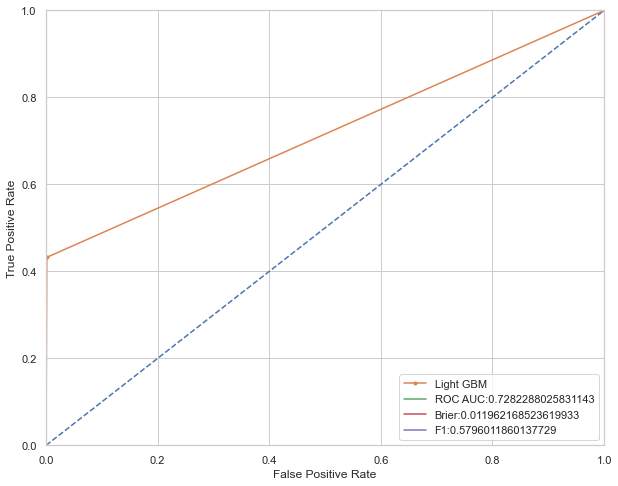

In [249]:
lg_class1_probs = lg.predict_proba(x_test)[:,1]
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, cb_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Light GBM')
plt.plot(0, label = 'ROC AUC:'+str(lg_roc_auc))

plt.plot(0, label = 'Brier:'+str(lg_brier))
plt.plot(0, label = 'F1:'+str(lg_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [250]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    lg_thresh_predicts = lg_class1_probs > threshold
    precision = precision_score(y_test, lg_thresh_predicts)
    recall = recall_score(y_test, lg_thresh_predicts)
    f1 = f1_score(y_test, lg_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.365, Completeness = 0.814 | F1 = 0.504
Threshold = 0.02 | Accuracy = 0.449, Completeness = 0.788 | F1 = 0.572
Threshold = 0.03 | Accuracy = 0.486, Completeness = 0.746 | F1 = 0.589
Threshold = 0.04 | Accuracy = 0.518, Completeness = 0.729 | F1 = 0.606
Threshold = 0.05 | Accuracy = 0.544, Completeness = 0.678 | F1 = 0.604
Threshold = 0.06 | Accuracy = 0.571, Completeness = 0.678 | F1 = 0.620
Threshold = 0.07 | Accuracy = 0.582, Completeness = 0.661 | F1 = 0.619
Threshold = 0.08 | Accuracy = 0.605, Completeness = 0.661 | F1 = 0.632
Threshold = 0.09 | Accuracy = 0.626, Completeness = 0.653 | F1 = 0.639
Threshold = 0.10 | Accuracy = 0.636, Completeness = 0.636 | F1 = 0.636
Threshold = 0.11 | Accuracy = 0.647, Completeness = 0.636 | F1 = 0.641
Threshold = 0.12 | Accuracy = 0.658, Completeness = 0.636 | F1 = 0.647
Threshold = 0.13 | Accuracy = 0.664, Completeness = 0.636 | F1 = 0.649
Thresh

In [251]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    lg_thresh_predicts = lg_class1_probs > threshold
    f1 = f1_score(y_test, lg_thresh_predicts)
    if f1_list.max() == f1:
        lg_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", lg_best_threshold)

def custom_predict_lg(X, threshold):
    
    return (lg_class1_probs > threshold).astype(int)
    
    
lg_thresh_predicts = custom_predict_lg(X = x_test, threshold = lg_best_threshold) 

lg_thresh_cm= confusion_matrix(y_test, lg_thresh_predicts)
print("\Cat Boost Confusion Matrix:\n")
print(lg_thresh_cm)

print(classification_report(y_test, lg_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.667 and best threshold is: 0.19
\Cat Boost Confusion Matrix:

[[5387   28]
 [  45   73]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.72      0.62      0.67       118

    accuracy                           0.99      5533
   macro avg       0.86      0.81      0.83      5533
weighted avg       0.99      0.99      0.99      5533



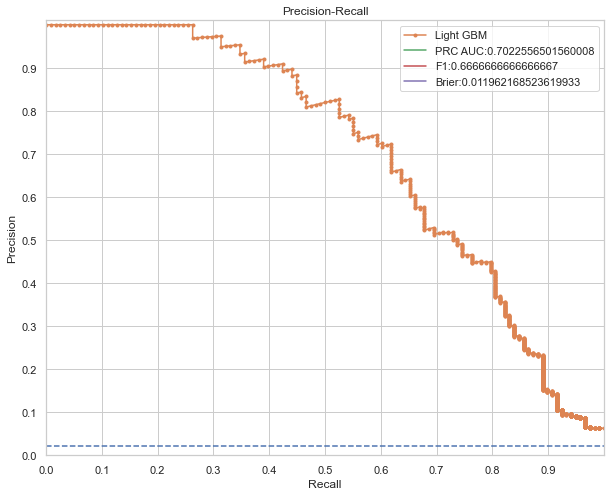

In [252]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, lg_class1_probs)
lg_thresh_f1, lg_prc_auc = f1_score(y_test, lg_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Light GBM')
plt.plot(0,label='PRC AUC:'+str(lg_prc_auc))

plt.plot(0,label='F1:'+str(lg_thresh_f1))
plt.plot(0,label='Brier:'+str(lg_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

#### Hyperparameter Tuning

In [253]:


lg_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.4,0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]
              
              }



    
    
             
            

lg_tuned = RandomizedSearchCV(lg, 
                           lg_params, 
                           cv = cv,
                           n_iter=50,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 


lg_tuned.fit(x_train, y_train)
print("En iyi parametreler: " + str(lg_tuned.best_params_))

lg_tuned= LGBMClassifier(
                     
                     
                     n_estimators=lg_tuned.best_params_["n_estimators"],
               subsample=lg_tuned.best_params_["subsample"],
               max_depth=lg_tuned.best_params_["max_depth"],
               
                             learning_rate=lg_tuned.best_params_["learning_rate"],
                             min_child_samples=lg_tuned.best_params_["min_child_samples"]
    
    
                        
              
                     )
                              

lg_tuned.fit(x_train, y_train)

lg_tuned_predicts= lg_tuned.predict(x_test)

lg_tuned_class1_probs =lg_tuned.predict_proba(x_test)[:, 1]

lg_tuned_cm= confusion_matrix(y_test, lg_tuned_predicts)
print("\nlight GBM Confusion Matrix:\n")
print(lg_tuned_cm)

print(classification_report(y_test, lg_tuned_predicts, target_names=target_names))


print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi parametreler: {'subsample': 1.0, 'n_estimators': 2000, 'min_child_samples': 20, 'max_depth': 3, 'learning_rate': 0.02}

light GBM Confusion Matrix:

[[5402   13]
 [  63   55]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.81      0.47      0.59       118

    accuracy                           0.99      5533
   macro avg       0.90      0.73      0.79      5533
weighted avg       0.98      0.99      0.98      5533

--- 2400.2553446292877 seconds ---


In [254]:

lg_tuned_f1 = cross_val_score(lg_tuned, x, y, cv=cv, scoring='f1').mean()
print("Light GBM doğrulanmış f1 skoru:", lg_tuned_f1)

#---------------------------------




lg_tuned_brier = -1*cross_val_score(lg_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nLight GBM doğrulanmış brier skoru:", lg_tuned_brier)

#---------------------------------


lg_tuned_roc_auc = cross_val_score(lg_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nLight GBM doğrulanmış roc-auc skoru:", lg_tuned_roc_auc)

Light GBM doğrulanmış f1 skoru: 0.6029656132519955

Light GBM doğrulanmış brier skoru: 0.011536404550039042

Light GBM doğrulanmış roc-auc skoru: 0.7445983964616005


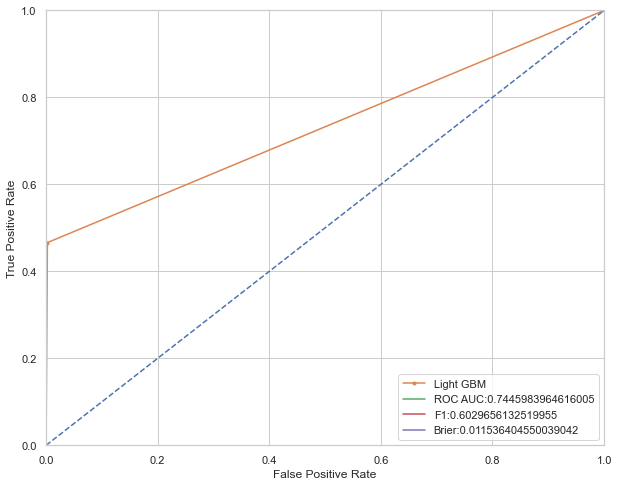

In [255]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, lg_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Light GBM')
plt.plot(0, label = 'ROC AUC:'+str(lg_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(lg_tuned_f1))
plt.plot(0, label = 'Brier:'+str(lg_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [256]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    lg_tuned_thresh_predicts = lg_tuned_class1_probs > threshold
    precision = precision_score(y_test,lg_tuned_thresh_predicts)
    recall = recall_score(y_test, lg_tuned_thresh_predicts)
    f1 = f1_score(y_test, lg_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.212, Completeness = 0.864 | F1 = 0.340
Threshold = 0.02 | Accuracy = 0.294, Completeness = 0.847 | F1 = 0.437
Threshold = 0.03 | Accuracy = 0.355, Completeness = 0.839 | F1 = 0.499
Threshold = 0.04 | Accuracy = 0.398, Completeness = 0.814 | F1 = 0.535
Threshold = 0.05 | Accuracy = 0.445, Completeness = 0.797 | F1 = 0.571
Threshold = 0.06 | Accuracy = 0.472, Completeness = 0.780 | F1 = 0.588
Threshold = 0.07 | Accuracy = 0.508, Completeness = 0.763 | F1 = 0.610
Threshold = 0.08 | Accuracy = 0.536, Completeness = 0.763 | F1 = 0.629
Threshold = 0.09 | Accuracy = 0.550, Completeness = 0.746 | F1 = 0.633
Threshold = 0.10 | Accuracy = 0.564, Completeness = 0.746 | F1 = 0.642
Threshold = 0.11 | Accuracy = 0.571, Completeness = 0.746 | F1 = 0.647
Threshold = 0.12 | Accuracy = 0.580, Completeness = 0.737 | F1 = 0.649
Threshold = 0.13 | Accuracy = 0.593, Completeness = 0.729 | F1 = 0.654
Thresh

In [257]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    lg_tuned_thresh_predicts = lg_tuned_class1_probs > threshold
    f1 = f1_score(y_test, lg_tuned_thresh_predicts)
    if f1_list.max() == f1:
        lg_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", lg_tuned_best_threshold)

def custom_predict_lg_tuned(X, threshold):
    
    return (lg_tuned_class1_probs > threshold).astype(int)
    
    
lg_tuned_thresh_predicts = custom_predict_lg_tuned(X = x_test, threshold = lg_tuned_best_threshold) 

lg_tuned_thresh_cm= confusion_matrix(y_test, lg_tuned_thresh_predicts)
print("\nLight GBM Confusion Matrix:\n")
print(lg_tuned_thresh_cm)

print(classification_report(y_test, lg_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.676 and best threshold is: 0.21

Light GBM Confusion Matrix:

[[5384   31]
 [  42   76]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.71      0.64      0.68       118

    accuracy                           0.99      5533
   macro avg       0.85      0.82      0.83      5533
weighted avg       0.99      0.99      0.99      5533



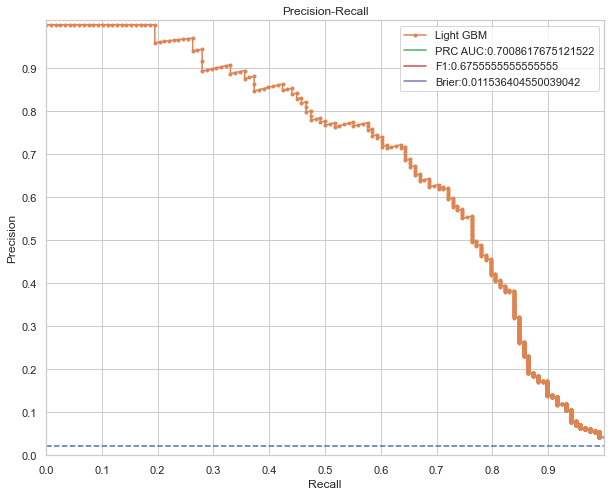

In [258]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, lg_tuned_class1_probs)
lg_tuned_thresh_f1, lg_tuned_prc_auc = f1_score(y_test, lg_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Light GBM')
plt.plot(0,label='PRC AUC:'+str(lg_tuned_prc_auc))

plt.plot(0,label='F1:'+str(lg_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(lg_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [259]:
lg_tuned_df_test_class1_probs = lg_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
lg_df_test_class1_probs = lg.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

lg_df_test_f1 = f1_score(df_forwards_model_test.Target, lg.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(lg_df_test_f1)

def custom_predict_lg_df_test(X, threshold):
    
    return (lg_df_test_class1_probs > threshold).astype(int)
    
lg_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_lg_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = lg_best_threshold))

print(lg_df_test_thresh_f1)

lg_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, lg_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(lg_tuned_df_test_f1)

def custom_predict_lg_tuned_df_test(X, threshold):
    
    return (lg_tuned_df_test_class1_probs > threshold).astype(int)
    
lg_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_lg_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = lg_tuned_best_threshold))

print(lg_tuned_thresh_df_test_f1)

0.5303867403314917
0.6037735849056604
0.5968586387434555
0.672


### Results

In [260]:
model_names = ['Light GBM', 'Random Forest', 'Bagging', 'GBM', 'Ada Boost', 'Extra Trees', 'Naive Bayes','XG Boost', 
               'Cat Boost']



brier = [lg_brier, rf_brier, bag_brier, gbc_brier, ada_brier, et_brier, nb_brier,  xg_brier, cb_brier]

tuned_brier =[lg_tuned_brier, rf_tuned_brier, bag_tuned_brier, gbc_tuned_brier, ada_tuned_brier,  et_tuned_brier, nb_tuned_brier, 
               xg_tuned_brier, cb_tuned_brier]

f1 = [lg_f1, rf_f1, bag_f1, gbc_f1, ada_f1,  et_f1, nb_f1,  xg_f1, cb_f1]

thresh_f1=[lg_thresh_f1, rf_thresh_f1, bag_thresh_f1, gbc_thresh_f1, ada_thresh_f1,  et_thresh_f1, nb_thresh_f1,  
           xg_thresh_f1, cb_thresh_f1]

tuned_f1 = [lg_tuned_f1, rf_tuned_f1, bag_tuned_f1, gbc_tuned_f1, ada_tuned_f1,  et_tuned_f1, nb_tuned_f1, xg_tuned_f1, 
            cb_tuned_f1]

tuned_thresh_f1=[lg_tuned_thresh_f1, rf_tuned_thresh_f1, bag_tuned_thresh_f1, gbc_tuned_thresh_f1, ada_tuned_thresh_f1, 
                et_tuned_thresh_f1, nb_tuned_thresh_f1,  xg_tuned_thresh_f1, cb_tuned_thresh_f1]

df_test_f1 = [lg_df_test_f1, rf_df_test_f1, bag_df_test_f1, gbc_df_test_f1, ada_df_test_f1, et_df_test_f1, nb_df_test_f1, xg_df_test_f1, cb_df_test_f1]

df_test_thresh_f1 = [lg_df_test_thresh_f1, rf_df_test_thresh_f1, bag_df_test_thresh_f1, gbc_df_test_thresh_f1, ada_df_test_thresh_f1,
                    et_df_test_thresh_f1, nb_df_test_thresh_f1, xg_df_test_thresh_f1, cb_df_test_thresh_f1]

df_test_tuned_f1 = [lg_tuned_df_test_f1, rf_tuned_df_test_f1, bag_tuned_df_test_f1, gbc_tuned_df_test_f1, ada_tuned_df_test_f1,
                   et_tuned_df_test_f1, nb_tuned_df_test_f1, xg_tuned_df_test_f1, cb_tuned_df_test_f1]

df_test_tuned_thresh_f1 = [lg_tuned_thresh_df_test_f1, rf_tuned_thresh_df_test_f1, bag_tuned_thresh_df_test_f1, gbc_tuned_thresh_df_test_f1,
                          ada_tuned_thresh_df_test_f1, et_tuned_thresh_df_test_f1, nb_tuned_thresh_df_test_f1, xg_tuned_thresh_df_test_f1,
                          cb_tuned_thresh_df_test_f1]

roc_auc = [lg_roc_auc, rf_roc_auc, bag_roc_auc, gbc_roc_auc, ada_roc_auc,  et_roc_auc, nb_roc_auc, xg_roc_auc, cb_roc_auc]

prc_auc =[lg_prc_auc, rf_prc_auc, bag_prc_auc, gbc_prc_auc, ada_prc_auc,  et_prc_auc, nb_prc_auc,  xg_prc_auc, cb_prc_auc]

tuned_roc_auc = [lg_tuned_roc_auc, rf_tuned_roc_auc, bag_tuned_roc_auc, gbc_tuned_roc_auc, ada_tuned_roc_auc,  et_tuned_roc_auc,
                nb_tuned_roc_auc, xg_tuned_roc_auc, cb_tuned_roc_auc]

tuned_prc_auc =[lg_tuned_prc_auc, rf_tuned_prc_auc, bag_tuned_prc_auc, gbc_tuned_prc_auc, ada_tuned_prc_auc,  et_tuned_prc_auc,
               nb_tuned_prc_auc,  xg_tuned_prc_auc, cb_tuned_prc_auc]

In [261]:
model_compare = pd.DataFrame({'Model': model_names, 'Brier': brier,'Tuned Brier': tuned_brier, 'F1': f1,'Thresh F1': thresh_f1,
             'Tuned F1': tuned_f1, 'Tuned Thresh F1': tuned_thresh_f1, 'Test F1':df_test_f1, 'Test Thresh F1':df_test_thresh_f1, 'Test Tuned F1':
              df_test_tuned_f1, 'Test Tuned Thresh F1':df_test_tuned_thresh_f1, 'Roc Auc': roc_auc, 'Prc Auc': prc_auc, 'Tuned Roc Auc': tuned_roc_auc,
             'Tuned Prc Auc': tuned_prc_auc})

In [310]:
model_compare.sort_values(by='Tuned F1', ascending = False)

Model     Brier  Tuned Brier        F1  Thresh F1  Tuned F1  \
0      Light GBM  0.011962     0.011536  0.579601   0.666667  0.602966   
7       XG Boost  0.011870     0.011202  0.598443   0.672646  0.590710   
4      Ada Boost  0.207043     0.227807  0.525088   0.598985  0.587325   
8      Cat Boost  0.011323     0.012309  0.581101   0.680328  0.587176   
3            GBM  0.012694     0.010857  0.531113   0.637097  0.585198   
5    Extra Trees  0.012839     0.013519  0.396327   0.640777  0.555900   
1  Random Forest  0.012785     0.013139  0.441041   0.639269  0.406214   
6    Naive Bayes  0.075668     0.071612  0.293412   0.385965  0.299379   
2        Bagging  0.014277     0.024735  0.448542   0.575342  0.000000   

   Tuned Thresh F1   Test F1  Test Thresh F1  Test Tuned F1  \
0         0.675556  0.530387        0.603774       0.596859   
7         0.705357  0.550265        0.578947       0.569892   
4         0.616216  0.500000        0.500000       0.567010   
8         0.678733  0.565217        0.652720       0.578947   
3         0.675799  0.480874        0.580645       0.580000   
5         0.639676  0.400000        0.573913       0.518919   
1         0.621622  0.420382        0.587719       0.368421   
6         0.394191  0.328990        0.376033       0.328308   
2         0.000000  0.453488        0.585586       0.000000   

   Test Tuned Thresh F1   Roc Auc   Prc Auc  Tuned Roc Auc  Tuned Prc Auc  
0              0.672000  0.728229  0.702256       0.744598       0.700862  
7              0.643172  0.739165  0.701605       0.735067       0.721329  
4              0.567010  0.721122  0.614891       0.736379       0.682011  
8              0.640693  0.735067  0.736245       0.735002       0.695756  
3              0.596491  0.711116  0.665887       0.739936       0.694162  
5              0.571429  0.630622  0.682150       0.717696       0.682875  
1              0.600000  0.646448  0.682977       0.629954       0.656309  
6              0.398249  0.869812  0.620240       0.868619       0.615593  
2              0.000000  0.654799  0.609310       0.500000       0.510663

In [311]:
df_forwards_test["Class"]=custom_predict_lg_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                          threshold = lg_tuned_best_threshold)
                                                                                                        

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\622693633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forwards_test["Class"]=custom_predict_lg_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]),


In [315]:
df_forwards_model_test

Height  Weight  Age   PA  Wor  Vis  Tec  Tea  Str  Sta  Pos  Pen  Pas  \
0        188      85   21  129   13   11   12   13   16   13   10   10   11   
1        174      79   22  109   15    9   10   15   12   13    6    3    8   
2        170      65   18  112   14    7   11   10    4   10    4    7    8   
3        170      63   28  115   10   11   12   13    7   12    5    6   10   
4        172      70   21  119   13   10   12   12   11   12    8    7   11   
...      ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4812     191      92   23  100    8    6    8    6   15   12    7    4    7   
4813     180      71   26  110   12   12   10   11   14   11    7   13    8   
4814     186      85   32  112    9    7   10    8   10    7    9    8    9   
4815     177      80   22  111   12    7    8   13    7   13   12    3   10   
4816     188      77   28  105   12   11   12   10   13   13   12   14   11   

      Pac  OtB  Nat  Lon  Ldr  Jum  Hea  Fre  Fla  Fir  Fin  Dri  Det  Dec  \
0      12   11   15    9   10   15   15    8   10    8   12    8   13   13   
1      14   12   10    8   12    8    7    4   14    8    9   10   10    8   
2      13   10   12    8    4    4    3    9   12   10    7   12   12    9   
3      11   11   13   10    3    7    5    6    7   10    7    9   17   15   
4      13   14   14   10   10    9   13    7   10   10   12   12   12    8   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4812   12   13   11    7    8   13   13    6   11   12   13   13    6    9   
4813   12   12   10    9   11   10   14    7   17   11   12   11    7    9   
4814   13   11    7    9   11   11   14    5    9   10   14   14    3    8   
4815   13    7   15    7    6    9    6    5    8    5    3    9   11   10   
4816   12   11   12   12   10   12   13    8   12   11   13   10    5   11   

      Cro  Cor  Cnt  Cmp  Bra  Bal  Ant  Agi  Agg  Acc  Target  \
0       8    8   12   11   11   14   12   10   10   11       0   
1       8    7   10    8    5    9    5   12   15   14       0   
2       7    5    9    9   12   10    8   13   15   15       0   
3      10    8   10    8    9    8   13   13    5   12       0   
4       8    6    7    5    7   13   10   12   11   12       0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
4812    2    4    5   11    5   10    8   10   10   13       0   
4813    7    7   12   14   12   11   13   11   11   12       0   
4814    5    4    7    7    8    9   13   10    7   14       0   
4815   10    1   10   13   11    8    8   12   10   15       0   
4816    9    7   12   11   12   11   11   12   10   11       0   

      Preferred Foot_Left  Preferred Foot_Right  
0                     0.0                   1.0  
1                     1.0                   0.0  
2                     0.0                   1.0  
3                     0.0                   1.0  
4                     0.0                   1.0  
...                   ...                   ...  
4812                  0.0                   1.0  
4813                  0.0                   1.0  
4814                  0.0                   1.0  
4815                  1.0                   0.0  
4816                  0.0                   1.0  

[4817 rows x 40 columns]

In [ ]:
nb_tuned.predict_proba(df_forwards_model_test)[:,1]

C:\Users\Mehmet\anaconda3\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


array([2.33487050e-05, 3.63940453e-06, 5.29284010e-04, ...,
       7.98988775e-05, 7.64861697e-06, 9.58813698e-06])

In [314]:
df_forwards_test["class1_probs"]=nb_tuned.predict_proba(df_forwards_model_test)[:,1]

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\1131307026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forwards_test["class1_probs"]=lg_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]


In [278]:
df_forwards_test["class1_probs"]=df_forwards_test.class1_probs*100

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_7416\528039525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forwards_test["class1_probs"]=df_forwards_test.class1_probs*100


In [281]:
df_forwards_test.sort_values(by='class1_probs', ascending = False)[0:20]

Name               Club  \
4666      Kylian MbappÃ©           Paris SG   
3403           Ansu Fati          Barcelona   
4808         Eden Hazard          R. Madrid   
1292         Leroy SanÃ©          FC Bayern   
1995        Riyad Mahrez           Man City   
426    Antoine Griezmann          Barcelona   
4760              Malcom              Zenit   
197              Rodrigo              Leeds   
968   Zlatan Ibrahimovic              Milan   
700          Sadio ManÃ©          Liverpool   
1262         Bukayo Saka            Arsenal   
316         Jadon Sancho  Borussia Dortmund   
4781              Marlos           Shakhtar   
4770              Taison           Shakhtar   
415     Gonzalo HiguaÃ­n           Juventus   
992         Talles Magno      Vasco da Gama   
555        Jack Grealish        Aston Villa   
2183        Serge Gnabry          FC Bayern   
4484       Romelu Lukaku              Inter   
2499  AbdÃ¼lkadir ÃmÃ¼r        Trabzonspor   

                               Division  Height  Weight  Age Best Pos   PA  \
4666                  Ligue 1 Conforama     178      73   20   ST (C)  196   
3403             Spanish First Division     178      55   16   AM (L)  181   
4808             Spanish First Division     173      76   28   AM (L)  185   
1292                         Bundesliga     183      75   23   AM (L)  177   
1995           English Premier Division     179      67   28   AM (R)  163   
426              Spanish First Division     175      71   28   ST (C)  185   
4760             Russian Premier League     175      71   22   AM (R)  163   
197            English Premier Division     182      77   28   ST (C)  165   
968                     Italian Serie A     195      95   37   ST (C)  185   
700            English Premier Division     175      69   27   AM (L)  184   
1262           English Premier Division     178      64   17   AM (L)  158   
316                          Bundesliga     180      76   19    M (L)  178   
4781           Ukrainian Premier League     174      69   31   AM (R)  160   
4770           Ukrainian Premier League     172      64   31   AM (L)  160   
415                     Italian Serie A     184      89   31   ST (C)  180   
992   Brazilian National First Division     186      70   16   AM (L)  158   
555            English Premier Division     178      64   23    M (L)  170   
2183                         Bundesliga     173      73   23   AM (L)  170   
4484                    Italian Serie A     191      94   26   ST (C)  173   
2499               Turkish Super League     168      62   19   AM (R)  139   

      Wor  Vis  Tec  Tea  Str  Sta  Pos  Pen  Pas  Pac  OtB  Nat  Lon  Ldr  \
4666   10   13   17   10   11   14    2   15   13   20   18   15   12   10   
3403   10   14   16   10    9   11    5   12   12   15   16   15   14    9   
4808   12   16   18    9   11   16    7   19   16   15   15   12   11    6   
1292   12   16   15   10   11   15    5   10   13   19   16   14   14    6   
1995   10   16   17   10    8   14    5   11   16   14   15   12   14    5   
426    14   16   17   12   10   13   10   13   15   14   18   15   14   14   
4760   10   15   16   11    9   12    6   12   13   15   16   13   14    8   
197    13   14   16   12   12   14    9   13   14   17   17   14   13    5   
968     7   16   18   10   18   10    4   18   15   10   14   15   16   17   
700    14   15   16   14   12   14   11   10   14   18   16   18   13    9   
1262   14   13   14   13    9   13    5   10   12   16   15   14   11    3   
316    11   17   17   12    8   12    6   12   14   15   16   12   11    5   
4781    9   14   17   12   12   13    5   14   13   13   16   15   14    5   
4770   13   15   17   13   12   13    4   12   13   16   15   14   16   14   
415    16   14   16   18   16   14    5   14   15   14   17   14   16   12   
992    12   13   16   11   11   13    5   11   12   14   13   15   11   11   
555    15   16   16   14   14   13   10   12   15   15   14   15   

In [268]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 2415.098350048065 seconds ---


In [ ]:
df_forwards_test[df_forwards_test["PA"]>=130].sample(10)

Name           Club                            Division  \
2286          Lucas Gomes          FCP B  Brazilian National Fourth Division   
1136  SebastiÃ¡n Cocimano  Gimnasia (LP)          Argentine Premier Division   
1371        Silvio Romero  Independiente          Argentine Premier Division   
3194        Martin Harnik     Dassendorf                 German Div. Hamburg   
1590         Franco Cervi            SLB           Portuguese Premier League   
2080     Jonathan Calleri        Osasuna              Spanish First Division   
1354              Michael       Flamengo   Brazilian National First Division   
3409             Pedrinho    Corinthians   Brazilian National First Division   
3378     Yeferson Soteldo         Santos   Brazilian National First Division   
2640         Fedor Chalov    CSKA Moscow              Russian Premier League   

      Height  Weight  Age Best Pos   PA  Wor  Vis  Tec  Tea  Str  Sta  Pos  \
2286     178      66   16   ST (C)  141   13   11   12   12   11   11    4   
1136     188      77   19   ST (C)  145    9   10   14    9    8    7   10   
1371     176      76   30   ST (C)  140   14   14   14   14   14   13    7   
3194     185      76   32   AM (R)  141   11   10   12   13   11   13    9   
1590     167      60   25   AM (L)  142   18   13   13   14    7   16   13   
2080     178      75   25   ST (C)  144   17   12   13   16   14   16    9   
1354     166      60   23   AM (L)  140   12   13   18   12    5   14   11   
3409     172      65   21   AM (R)  165    9   14   17   14    6   11    7   
3378     160      63   21   AM (L)  146   14   13   13   13   11   14   10   
2640     180      77   21   ST (C)  150   10   14   13   14   11   14   10   

      Pen  Pas  Pac  OtB  Nat  Lon  Ldr  Jum  Hea  Fre  Fla  Fir  Fin  Dri  \
2286   11   10   12   13   11    9    6   11    1    7   12   11   13   11   
1136   11   10   12   15   16   10    9    9   13    9   12   15   12   12   
1371   14   13   12   15   12   12   13    8   10    9   16   14   15   14   
3194   10   10   12   16   18    9   10   14   13    7   13   11   13   10   
1590   12   13   14   15   17   12    9    7    4   12   15   12   11   12   
2080   11   12   13   15   14   12    6   12   14    6   12   13   13   12   
1354   10   13   13   15    8   11   10    4    5    8   18   13   13   17   
3409   11   14   13   14   10   13    6    4    5   11   16   16   11   16   
3378    9    9   15   15   10   10    6    4    5   12   15   11   12   16   
2640   13   13   14   16   13   11   11   10    6   10   16   13   13   12   

      Det  Dec  Cro  Cor  Cnt  Cmp  Bra  Bal  Ant  Agi  Agg  Acc  Target  \
2286   14   10    8    7    7   11   10   10   10   11    6   12       0   
1136   12    8    6    9   10   13    8   10   13   13    8   15       0   
1371   15   14   10    9   12   16   13   12   14   12    9   12       0   
3194   16   12    9    6   12   11   14   10   14   13   11   12       0   
1590   18   12   11   12   14   11   17   12   14   15   16   16       0   
2080   15   13   10    9   12   12   15   14   15   14   11   14       0   
1354   15   13    9    8   12   12   12   10   12   16   12   15       0   
3409   14   13   13   12   13   12    7    7   13   16    8   15       1   
3378   11   13   13    9   11   12    7   11   13   15   12   16       0   
2640   17   13    9    9   14   13   15   11   14   14   13   15       1   

      Preferred Foot_Left  Preferred Foot_Right  Class  class1_probs  
2286                  1.0                   0.0      0     12.521063  
1136                  0.0                   1.0      0      1.004049  
1371                  0.0                   1.0      1     49.185674  
3194                  0.0                   1.0      0      0.443358  
1590                  1.0                   0.0      1     27.137431  
2080                  0.0                   1.0      1     21.828501  
1354                  1.0                   1.0      1     22.880117  
3409             